# Import Statements

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from scipy.spatial.distance import mahalanobis
from google.colab import drive
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats

# Installations

In [ ]:
!pip install spacy
!pip install spacy
!python -m spacy download el_core_news_sm
!pip install -U grecy
!python -m grecy install grc_perseus_sm
!pip install grc_perseus_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 27.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Installing grc_perseus_sm.....

Please wait, this could take some minutes.....

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 MB 11.6 MB/s eta 0:00:00

























































































# Mounting Drive and Books

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def process_csv_files(folder_path):
    data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)

            csv_data = []

            with open(file_path, 'r', encoding='utf-8') as csv_file:
                csv_reader = csv.reader(csv_file)
                for row in csv_reader:
                    for cell in row:
                        words = cell.split()
                        csv_data.extend(words)

            data.append(csv_data)

    return data

In [ ]:
Illiad_folder_path = '/content/drive/MyDrive/iliad_csvs'
Modern_folder_path = '/content/drive/MyDrive/book2_csvs'

In [ ]:
Illiad_linguistic_data = process_csv_files(Illiad_folder_path)

In [ ]:
Modern_linguistic_data = process_csv_files(Modern_folder_path)

# Formality Checker

In [ ]:
nlp = spacy.load("grc_perseus_sm")

In [ ]:
def detect_formality(sentences):
    results = []

    for sentence in sentences:
        text = ' '.join(sentence)

        doc = nlp(text)

        formal_count = 0
        informal_count = 0

        #Change these to specifically reflect features of the greek language. Modify to use SPACY maybe.
        formal_features = {"VERB", "ADV", "ADJ", "NOUN","AUX", "ADP", "CCONJ"}
        informal_features = {"INTJ","X", "PRON", "PROPN"}

        for token in doc:
            if token.pos_ in formal_features:
                formal_count += 1
            elif token.pos_ in informal_features:
                informal_count += 1

        if 0.3 * (formal_count + informal_count) < informal_count:
            result = "Informal"
        else:
            result = "Formal"

        results.append(result)

    return results

In [ ]:
Illiad_sentences = Illiad_linguistic_data
Illiad_results = detect_formality(Illiad_sentences)
print(Illiad_results)
print(Illiad_results.count('Formal'))

['Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal

In [ ]:
Modern_sentences = Modern_linguistic_data
Modern_results = detect_formality(Modern_sentences)
print(Modern_results)
print(Modern_results.count('Formal'))

['Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Informal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Informal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Formal', 'Fo

In [ ]:
def filter_sentences_by_formality(sentences, formality_results, target_formality):
    filtered_sentences = []

    for i, result in enumerate(formality_results):
        if result == target_formality:
            filtered_sentences.append(sentences[i])

    return filtered_sentences

In [ ]:
Illiad_informal = filter_sentences_by_formality(Illiad_linguistic_data, Illiad_results, 'Informal')
Illiad_formal = filter_sentences_by_formality(Illiad_linguistic_data, Illiad_results, 'Formal')
print(len(Illiad_informal))
print(len(Illiad_informal) + len(Illiad_formal))
Illiad_informal

117
3432


[['Ἰδομενεὺς',
  "δ'",
  'ἄρα',
  'Φαῖστον',
  'ἐνήρατο',
  'Μῄονος',
  'υἱὸν',
  'Βώρου,',
  'ὃς',
  'ἐκ',
  'Τάρνης',
  'ἐριβώλακος',
  'εἰληλούθει'],
 ['Κρητῶν',
  "δ'",
  'Ἰδομενεὺς',
  'δουρὶ',
  'κλυτὸς',
  'ἡγεμόνευεν,',
  'οἳ',
  'Κνωσόν',
  "τ'",
  'εἶχον',
  'Γόρτυνά',
  'τε',
  'τειχιόεσσαν,',
  'Λύκτον',
  'Μίλητόν',
  'τε',
  'καὶ',
  'ἀργινόεντα',
  'Λύκαστον',
  'Φαιστόν',
  'τε',
  'Ῥύτιόν',
  'τε,',
  'πόλεις',
  'εὖ',
  'ναιετοώσας,',
  'ἄλλοι',
  "θ'",
  'οἳ',
  'Κρήτην',
  'ἑκατόμπολιν',
  'ἀμφενέμοντο'],
 ['λῦσε', 'δέ', 'οἱ', 'θώρηκα', 'ἄναξ', 'Διὸς', 'υἱὸς', 'Ἀπόλλων'],
 ['ἄλλος',
  "δ'",
  'οὔ',
  'τις',
  'μοι',
  'τόσον',
  'αἴτιος',
  'Οὐρανιώνων,',
  'ἀλλὰ',
  'φίλη',
  'μήτηρ,',
  'ἥ',
  'με',
  'ψεύδεσσιν',
  'ἔθελγεν:',
  'ἥ',
  "μ'",
  'ἔφατο',
  'Τρώων',
  'ὑπὸ',
  'τείχεϊ',
  'θωρηκτάων',
  'λαιψηροῖς',
  'ὀλέεσθαι',
  'Ἀπόλλωνος',
  'βελέεσσιν'],
 ["ἔνθ'",
  'ὅ',
  'γε',
  'Κοίρανον',
  'εἷλεν',
  'Ἀλάστορά',
  'τε',
  'Χρομίον',
  'τε',
  'Ἄλκανδρόν',

In [ ]:
Modern_informal = filter_sentences_by_formality(Modern_linguistic_data, Modern_results, 'Informal')
Modern_formal = filter_sentences_by_formality(Modern_linguistic_data, Modern_results, 'Formal')
print(len(Modern_informal))
print(len(Modern_informal) + len(Modern_formal))
Modern_informal

107
1366


[['Θέλεις,',
  'Λιόλια,',
  'νὰ',
  'χορέψῃς',
  'λιγάκι',
  ';',
  'τὴν',
  'ἀρώ',
  'τησε',
  'ὁ',
  'Νῖκος'],
 ['βαστάει',
  'στὰ',
  'χέρια—',
  'ὅλη',
  'ἡ',
  'Γαργαρέττα',
  'ἔχει',
  'νὰ',
  'τὸ',
  'κάνῃ'],
 ['Τώρα',
  'πούμαι',
  'κ᾿',
  'ἐγὼ',
  'ἐδῶ',
  'νὰ',
  'πάῃ',
  'κι',
  'ὁ',
  'Κὺρ',
  'Νῖκος',
  'νὰ',
  'πάρῃ',
  'λιγουλάκι',
  'ἀέρα'],
 ['-',
  'Ξαφνίστηκαν',
  'ἡ',
  'Λιόλια',
  "κ'",
  'ἡ',
  'θειὰ',
  'Ελέγχω',
  'καθὼς',
  'εἶδαν',
  'τὸ',
  'Νῖκο',
  'φερμένον',
  'ἀπ᾿',
  'τὰ',
  'τώρα'],
 ['Ἐξαγριώθηκε', 'μονομιᾶς', 'ὁ', 'Νῖκος'],
 ['τὶς', 'ἀσκάλες'],
 ['Κύτταξε',
  'ὁ',
  'Νῖκος',
  'νὰ',
  'δῇ',
  'τὴ',
  'Λιό',
  'λια',
  ':',
  'χόρευε',
  'πάντα',
  'στὴν',
  'πέρα',
  'ἄκρη',
  'μὲ',
  'τὸ',
  'Μίμη'],
 ['κι', 'ἀρχίνησε', 'νὰ', 'κλαίῃ', ',', 'νὰ', 'θρηνῇ'],
 ['Πῶς', 'χόρευ᾽', 'ἡ', 'Λιόλια', 'μὲ', 'τὸ', 'Νῖκο', '!'],
 ['Ὁ', 'Νῖκος', 'τραβήχτηκε', 'πίσω,', 'ἀπότομα'],
 ['Εἶναι', 'καλὸ', 'κορίτσι'],
 ['Τώρα', 'νύχτωσε'],
 ['Βρίσκει', 'τὴν', 'πόρτα', 'κλε

# Mathematical Representation and Distance Querying

In [ ]:
def affinity_propagation(X, max_iter=200, damping=0.8, convergence_iter=15, random_state=None):
    affinity_prop = AffinityPropagation(max_iter=max_iter, damping=damping, convergence_iter=convergence_iter, random_state=random_state)
    cluster_centers_indices = affinity_prop.fit_predict(X)
    cluster_centers = np.array([X[cluster_centers_indices == i].mean(axis=0) for i in np.unique(cluster_centers_indices)])
    return cluster_centers_indices, cluster_centers

def mahalanobis_distance(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    return distances

def compute_covariance_matrix(cluster_data):
    if cluster_data.shape[0] > 1:
        return np.cov(cluster_data, rowvar=False)
    else:
        num_features = cluster_data.shape[1]
        return np.eye(num_features)

def plot_clusters(X, cluster_centers_indices, cluster_centers, query_point, min_cluster_index, figsize=(24, 24)):
    num_clusters = len(np.unique(cluster_centers_indices))
    cmap = plt.get_cmap('tab20', num_clusters)

    plt.figure(figsize=figsize)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_centers_indices, cmap=cmap)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')
    plt.scatter(query_point[0], query_point[1], marker='D', color='red', s=100, label='Query Point')
    if min_cluster_index != -1:
        min_cluster_center = cluster_centers[min_cluster_index]
        plt.scatter(min_cluster_center[0], min_cluster_center[1], marker='o', color='green', s=100, label='Closest Cluster')
    plt.legend()
    plt.title("Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


def embed_linguistic_data(linguistic_data):
    model = Word2Vec(sentences=linguistic_data, vector_size=100, window=5, min_count=1, sg=0)
    embeddings = [model.wv[word] for sentence in linguistic_data for word in sentence]
    return np.array(embeddings)


def find_closest_cluster(query_point, clusters, covariances, regularization=1e-6):
    distances = []
    for center, covariance in zip(clusters, covariances):
        inv_covariance = np.linalg.pinv(covariance + regularization * np.eye(covariance.shape[0]))
        distance = mahalanobis(query_point, center, inv_covariance)
        distances.append(distance)
    min_distance_index = np.argmin(distances)
    return min_distance_index

def calculate_jaccard_similarity(clustering1, clustering2):
    set1 = set(clustering1)
    set2 = set(clustering2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

# Clustering of Informal Phrases

Mean of z-score normalized data: [-1.2508866e-08 -3.8884934e-08]
Standard deviation of z-score normalized data: [1.0000005  0.99999976]


<ipython-input-160-1b8107a5911a>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


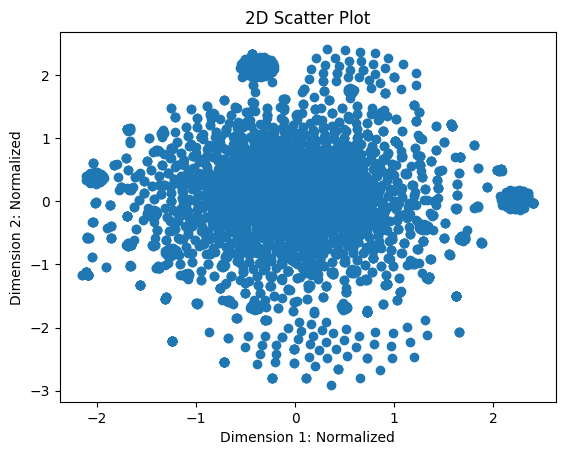

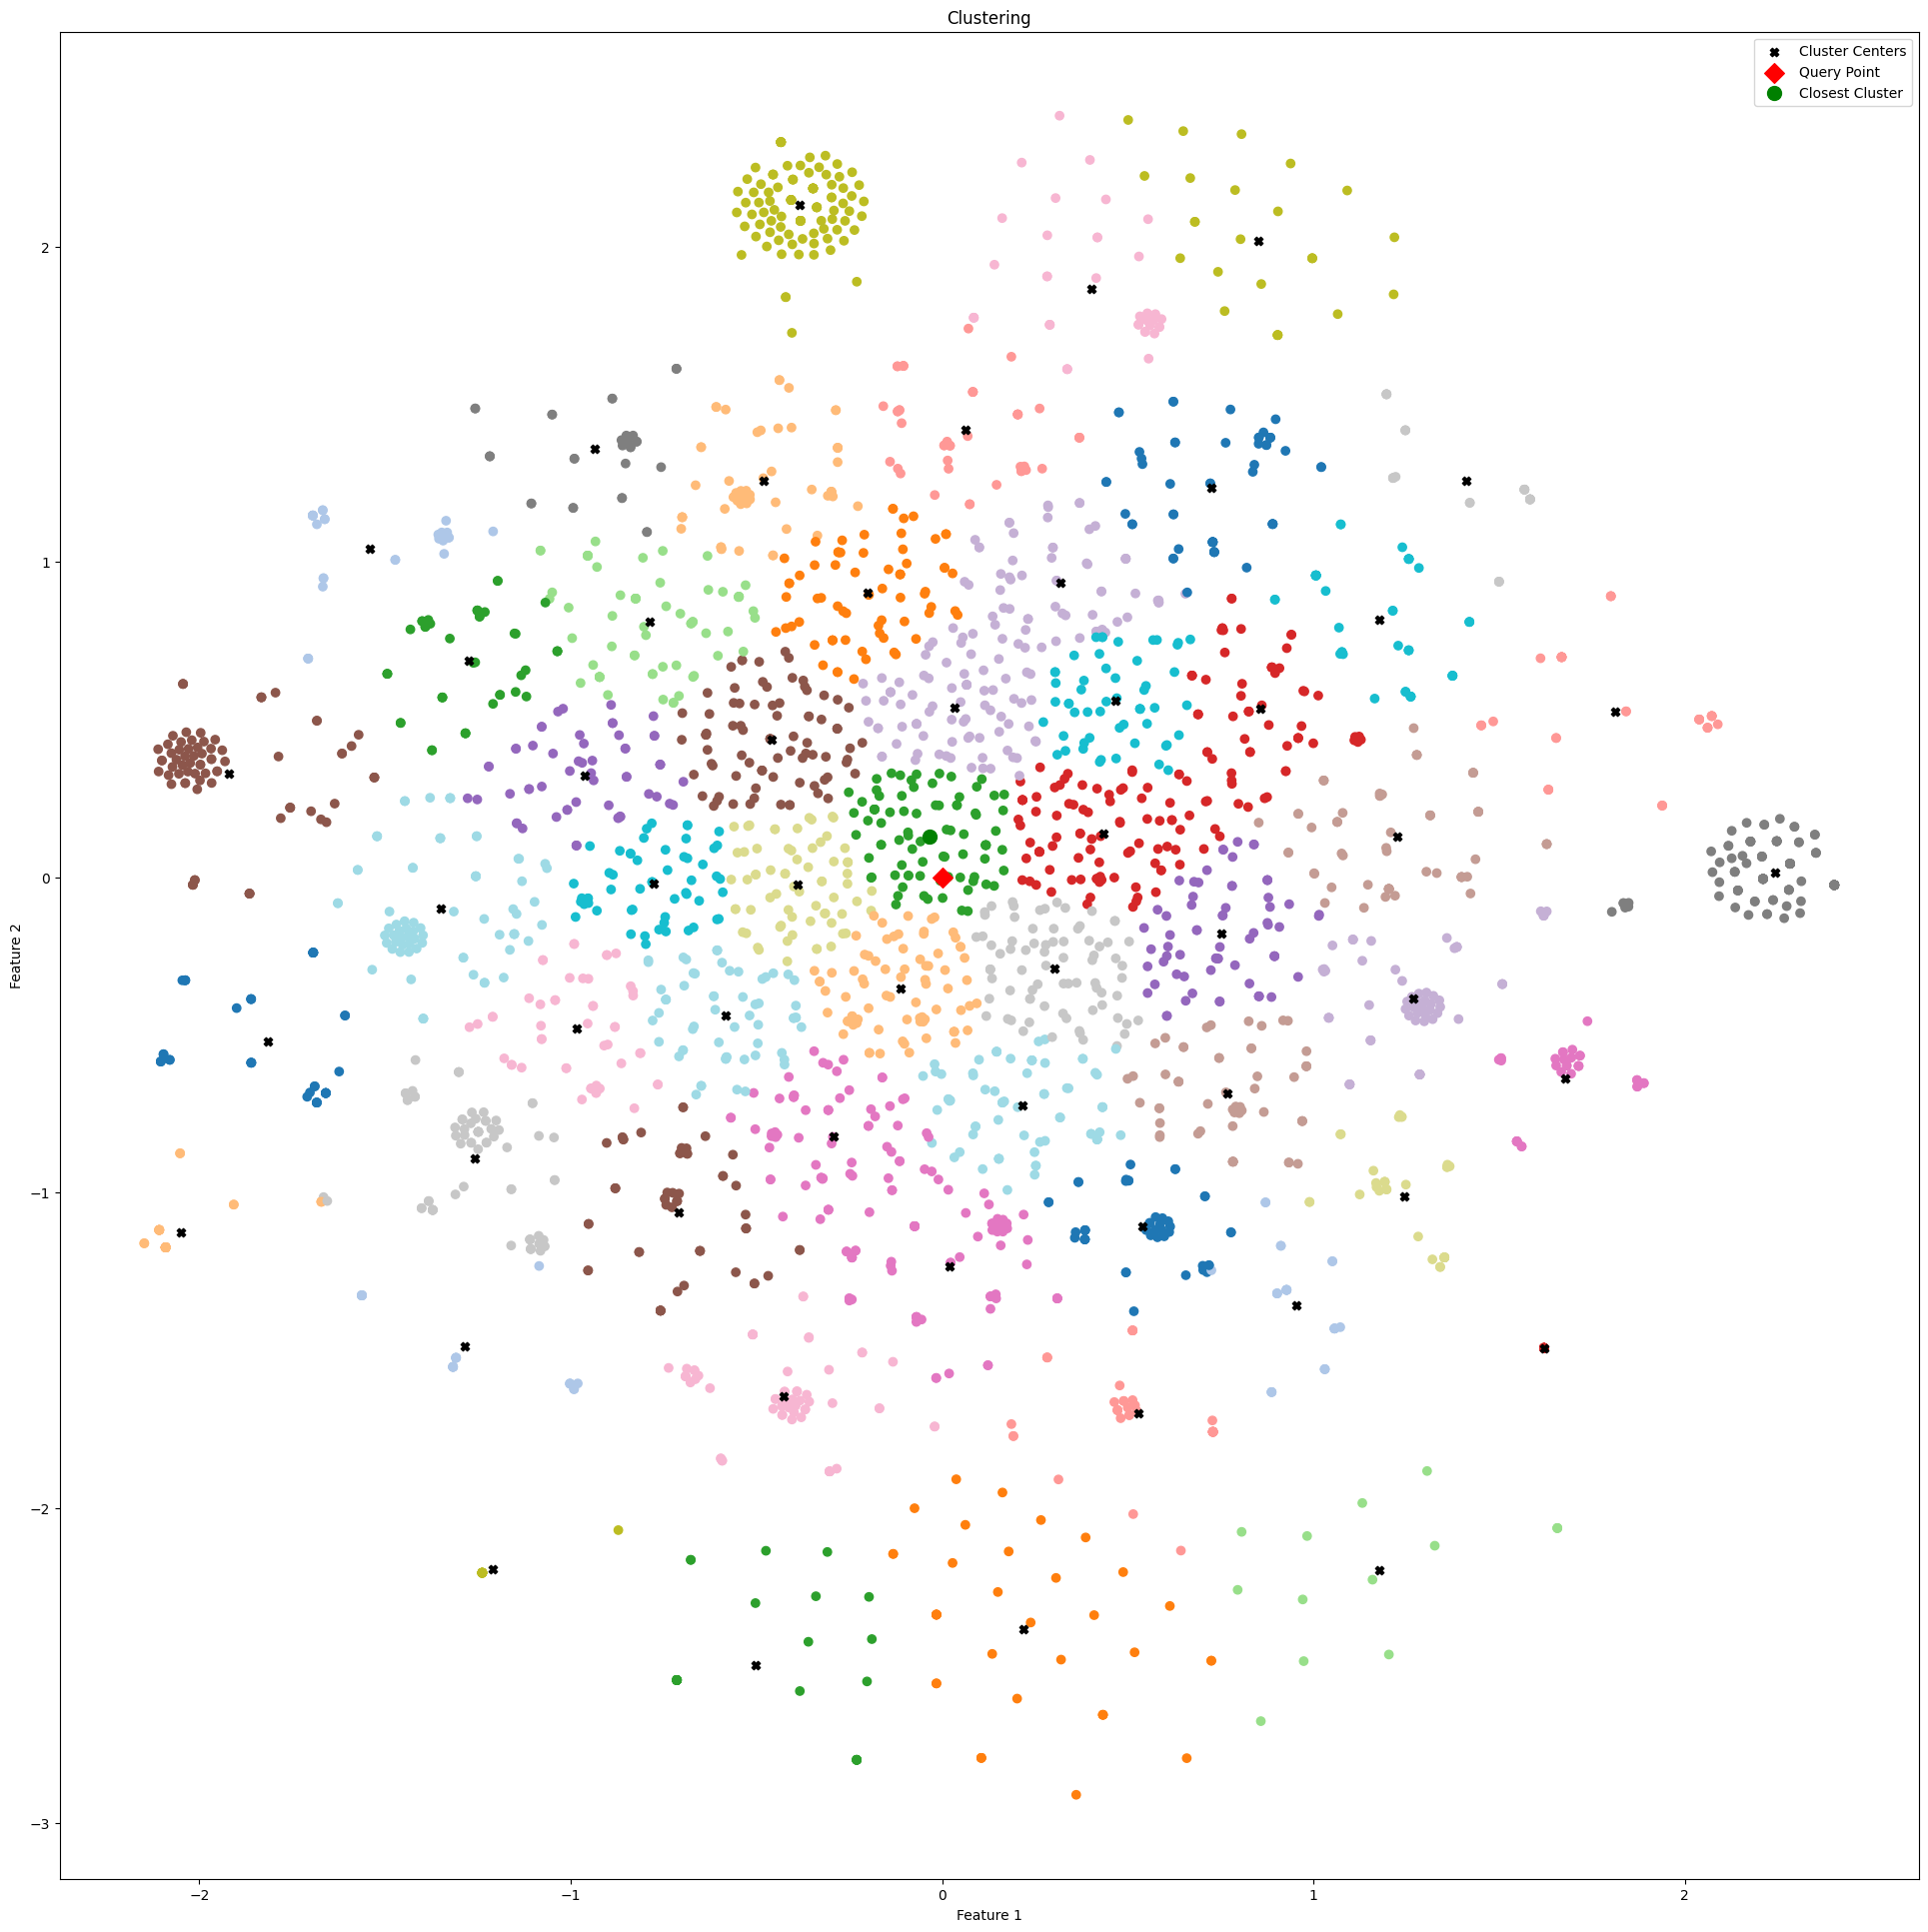

Cluster 1 - Mahalanobis Distance: 11.4153
Cluster 2 - Mahalanobis Distance: 8.5734
Cluster 3 - Mahalanobis Distance: 10.7765
Cluster 4 - Mahalanobis Distance: 12.0535
Cluster 5 - Mahalanobis Distance: 13.1860
Cluster 6 - Mahalanobis Distance: 23.3902
Cluster 7 - Mahalanobis Distance: 7.2370
Cluster 8 - Mahalanobis Distance: 9.2706
Cluster 9 - Mahalanobis Distance: 2.9244
Cluster 10 - Mahalanobis Distance: 17.8014
Cluster 11 - Mahalanobis Distance: 10.0182
Cluster 12 - Mahalanobis Distance: 13.0691
Cluster 13 - Mahalanobis Distance: 11.9557
Cluster 14 - Mahalanobis Distance: 1.0657
Cluster 15 - Mahalanobis Distance: 13.9147
Cluster 16 - Mahalanobis Distance: 7.0207
Cluster 17 - Mahalanobis Distance: 8.4552
Cluster 18 - Mahalanobis Distance: 3.0842
Cluster 19 - Mahalanobis Distance: 2203.3500
Cluster 20 - Mahalanobis Distance: 10.9383
Cluster 21 - Mahalanobis Distance: 9.4483
Cluster 22 - Mahalanobis Distance: 11.9184
Cluster 23 - Mahalanobis Distance: 6.7927
Cluster 24 - Mahalanobis Dis

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Illiad_informal)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(39)
    X = z_score_normalized_data

    Illiad_cluster_centers_indices, Illiad_cluster_centers = affinity_propagation(X)

    if not Illiad_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Illiad_clusters_data = [X[Illiad_cluster_centers_indices == i] for i in range(len(Illiad_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Illiad_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances01 = mahalanobis_distance(query_point, Illiad_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances01):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Illiad_cluster_centers_indices, Illiad_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances01):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

Mean of z-score normalized data: [-1.12284271e-08  1.05853895e-08]
Standard deviation of z-score normalized data: [0.99999964 0.9999994 ]


<ipython-input-161-1205b8dfac40>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


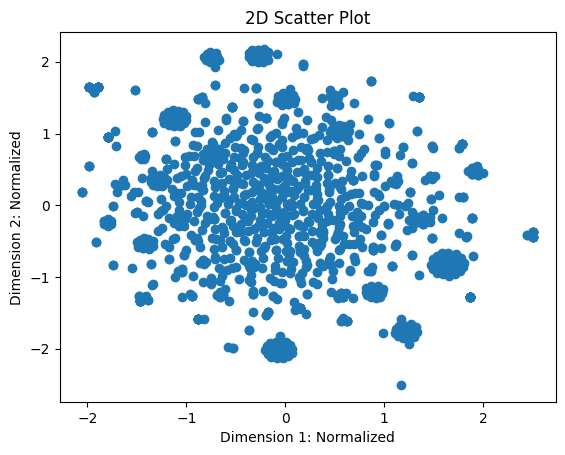

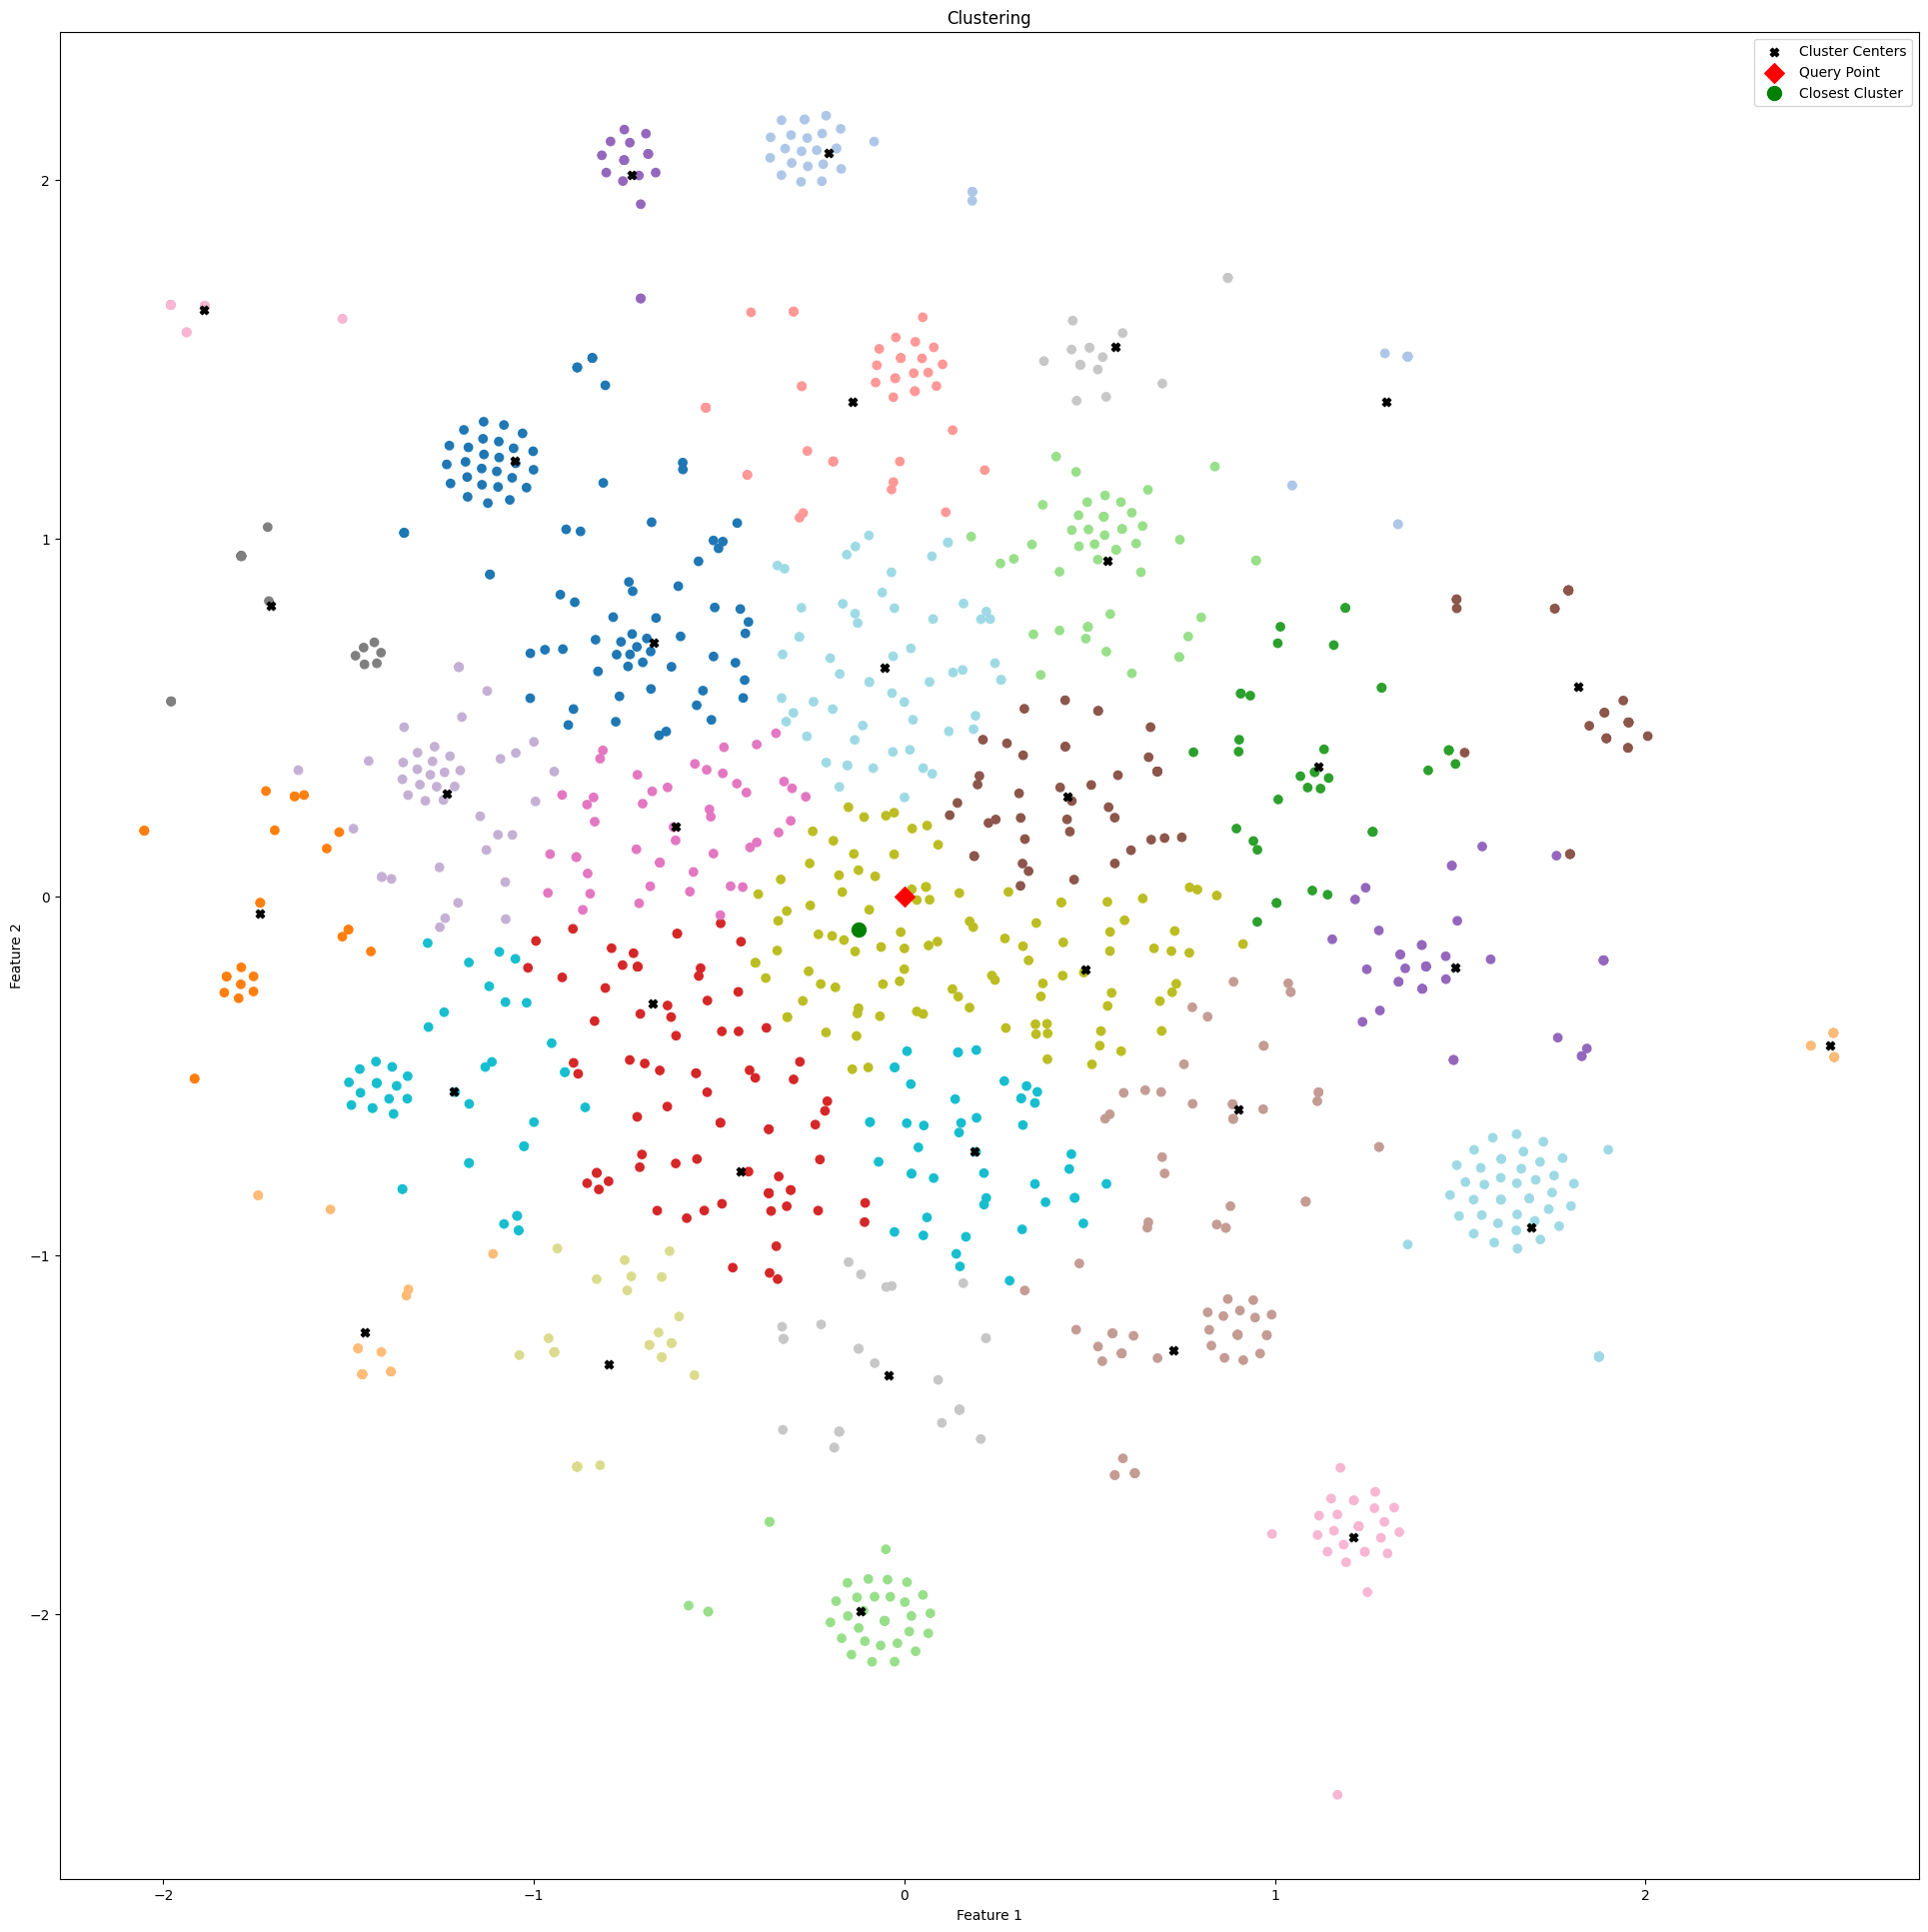

Cluster 1 - Mahalanobis Distance: 13.2502
Cluster 2 - Mahalanobis Distance: 6.9772
Cluster 3 - Mahalanobis Distance: 11.3676
Cluster 4 - Mahalanobis Distance: 36.1924
Cluster 5 - Mahalanobis Distance: 10.1113
Cluster 6 - Mahalanobis Distance: 103.7771
Cluster 7 - Mahalanobis Distance: 15.9319
Cluster 8 - Mahalanobis Distance: 6.0505
Cluster 9 - Mahalanobis Distance: 22.9949
Cluster 10 - Mahalanobis Distance: 6.8652
Cluster 11 - Mahalanobis Distance: 4.8348
Cluster 12 - Mahalanobis Distance: 5.5145
Cluster 13 - Mahalanobis Distance: 8.5363
Cluster 14 - Mahalanobis Distance: 20.7750
Cluster 15 - Mahalanobis Distance: 6.9491
Cluster 16 - Mahalanobis Distance: 9.0273
Cluster 17 - Mahalanobis Distance: 15.0732
Cluster 18 - Mahalanobis Distance: 2.9605
Cluster 19 - Mahalanobis Distance: 5.5796
Cluster 20 - Mahalanobis Distance: 9.3293
Cluster 21 - Mahalanobis Distance: 3.9295
Cluster 22 - Mahalanobis Distance: 21.0384
Cluster 23 - Mahalanobis Distance: 61.4890
Cluster 24 - Mahalanobis Distan

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Modern_informal)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(39)
    X = z_score_normalized_data

    Modern_cluster_centers_indices, Modern_cluster_centers = affinity_propagation(X)

    if not Modern_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Modern_clusters_data = [X[Modern_cluster_centers_indices == i] for i in range(len(Modern_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Modern_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances02 = mahalanobis_distance(query_point, Modern_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances02):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Modern_cluster_centers_indices, Modern_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances02):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
calculate_jaccard_similarity(Illiad_cluster_centers_indices, Modern_cluster_centers_indices)

0.6111111111111112

# Clustering of Formal Text (Control)

In [ ]:
Illiad_formal1 = Illiad_formal[:120]

Mean of z-score normalized data: [-1.1004517e-08 -4.0821988e-08]
Standard deviation of z-score normalized data: [0.99999917 1.0000015 ]


<ipython-input-164-cc56c6e7e6f9>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


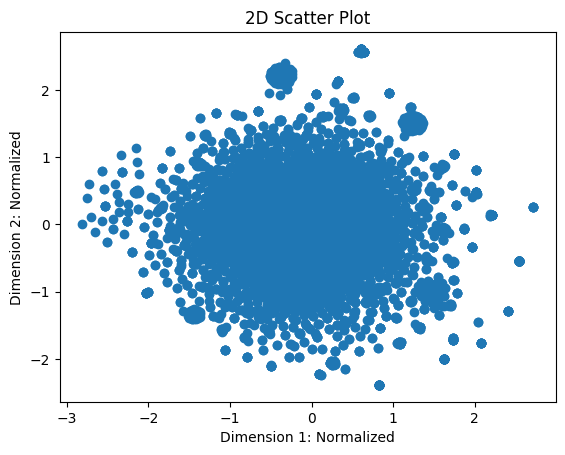

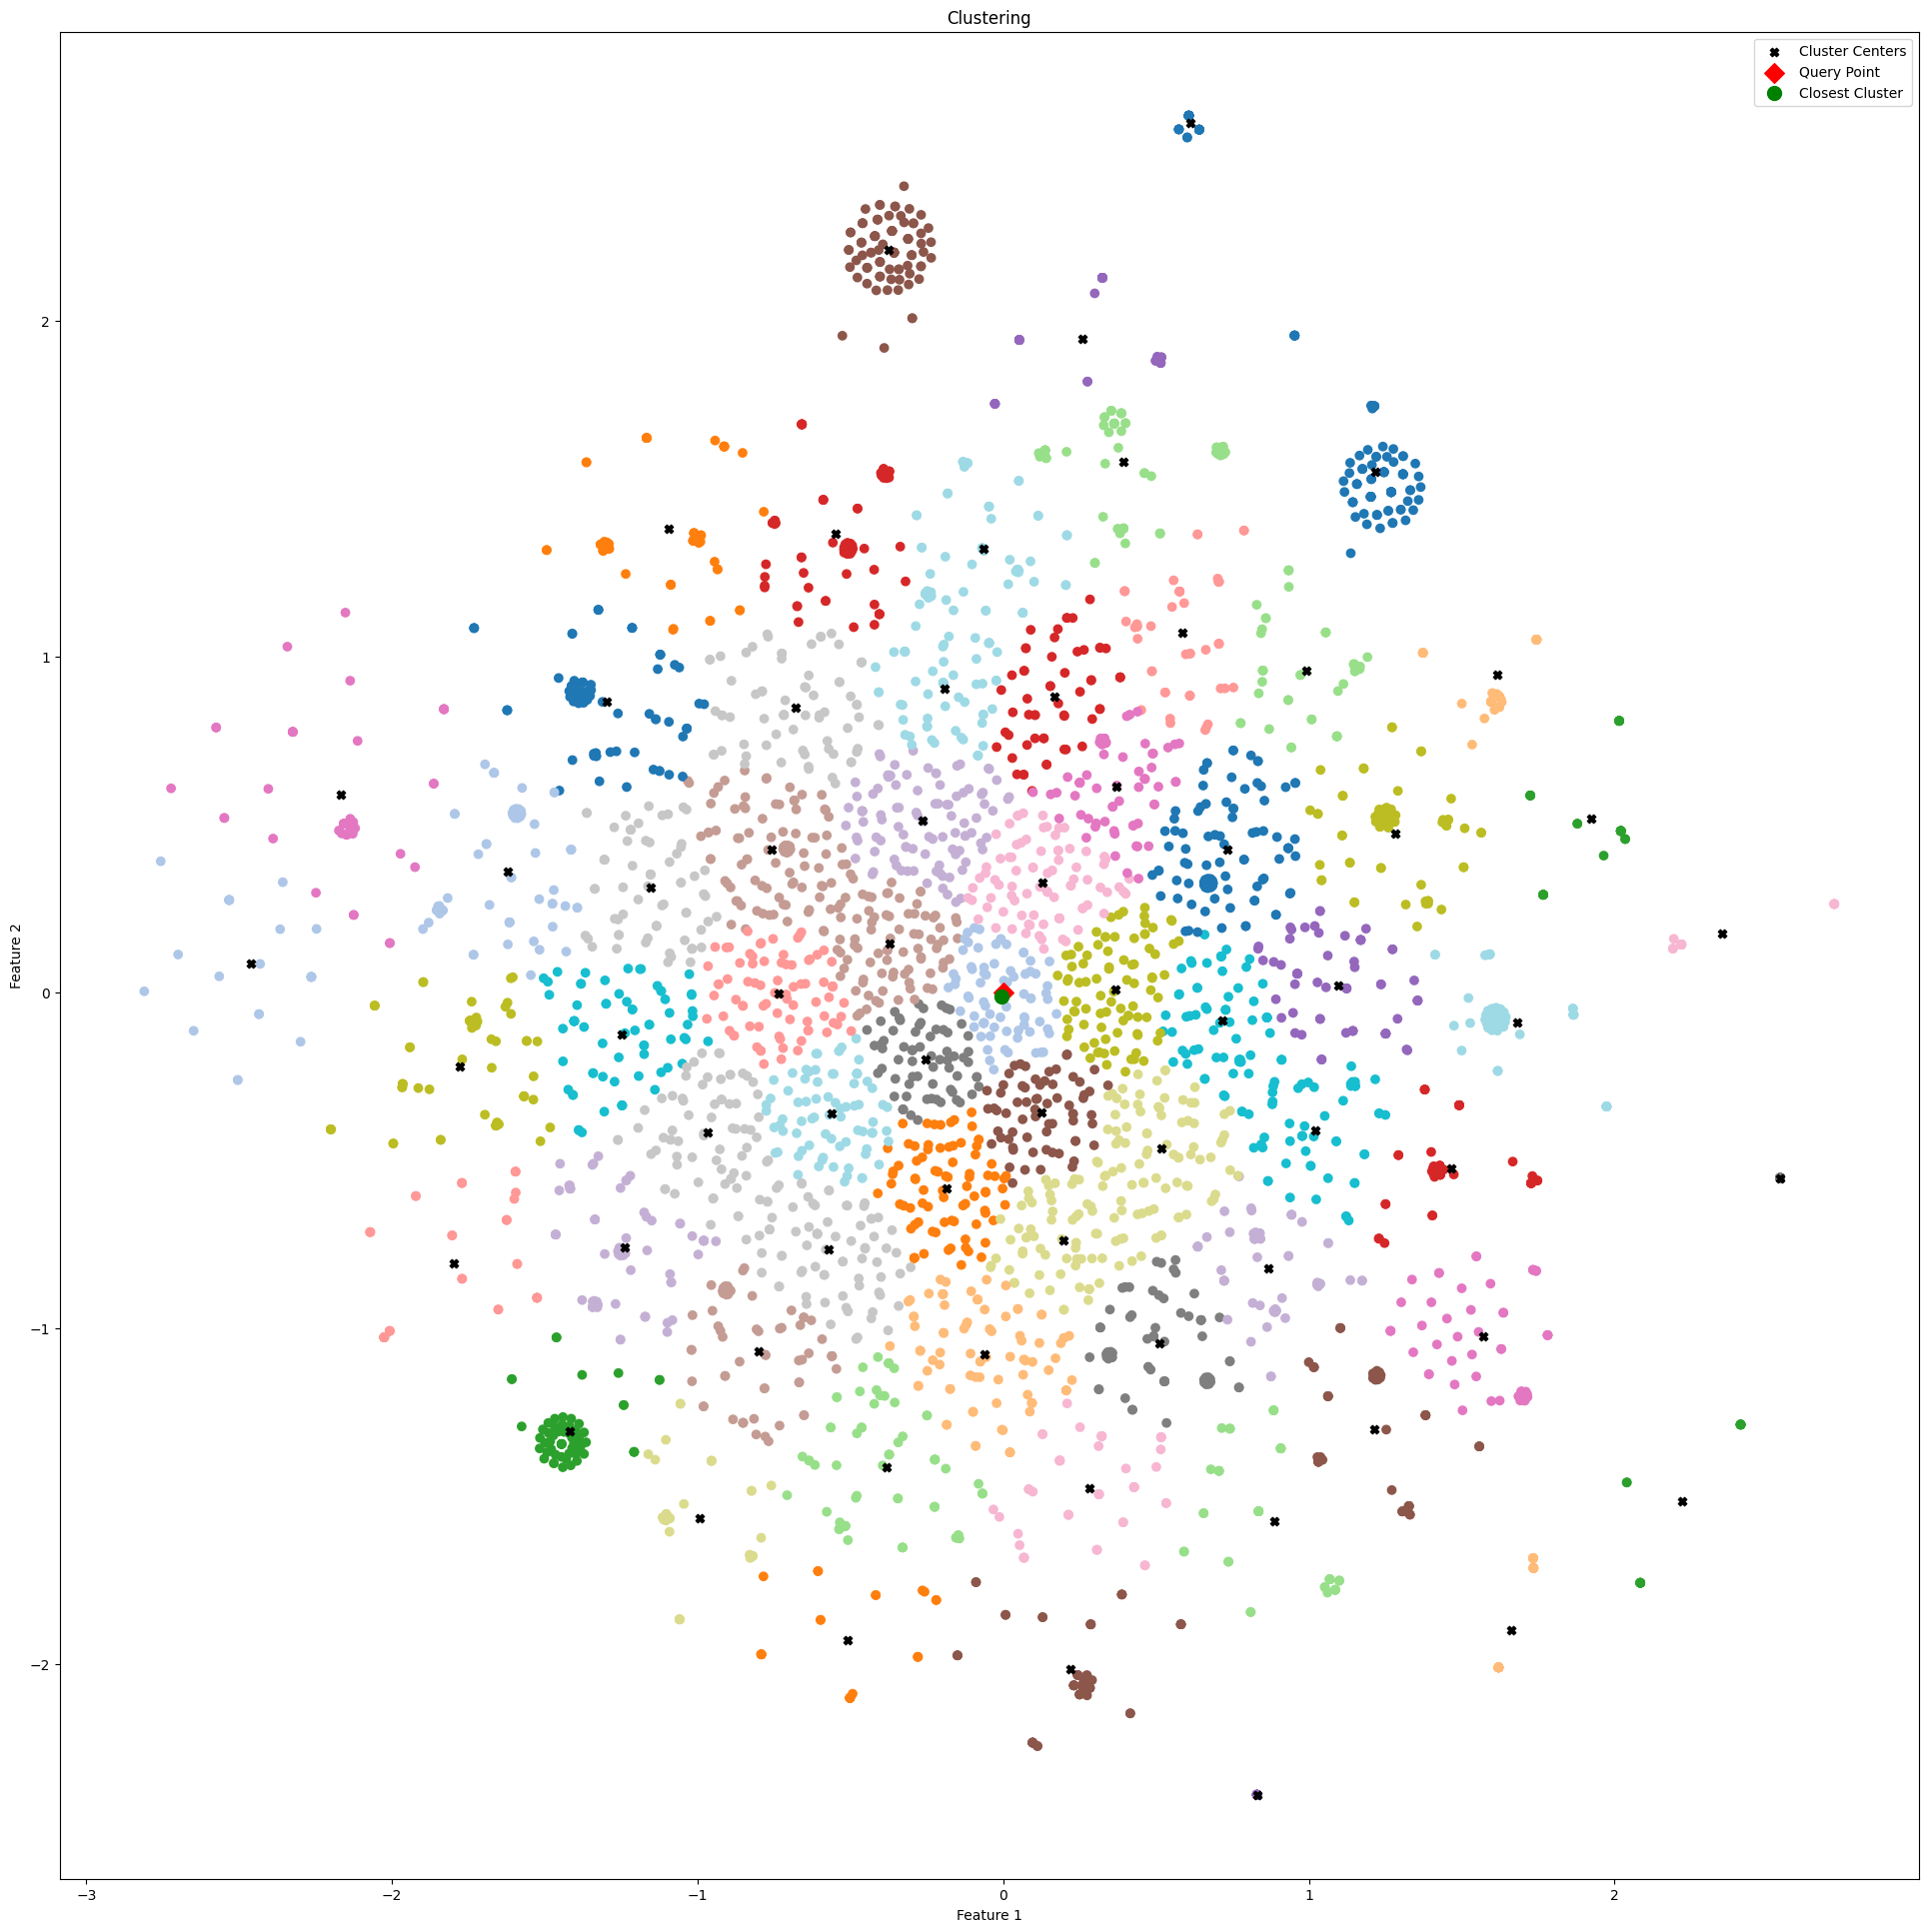

Cluster 1 - Mahalanobis Distance: 127.5519
Cluster 2 - Mahalanobis Distance: 6.1327
Cluster 3 - Mahalanobis Distance: 28.6830
Cluster 4 - Mahalanobis Distance: 8.6930
Cluster 5 - Mahalanobis Distance: 11.9137
Cluster 6 - Mahalanobis Distance: 14.9331
Cluster 7 - Mahalanobis Distance: 0.1342
Cluster 8 - Mahalanobis Distance: 5.1239
Cluster 9 - Mahalanobis Distance: 14.3322
Cluster 10 - Mahalanobis Distance: 10.1451
Cluster 11 - Mahalanobis Distance: 14.2842
Cluster 12 - Mahalanobis Distance: 8.2293
Cluster 13 - Mahalanobis Distance: 642.0476
Cluster 14 - Mahalanobis Distance: 19.3860
Cluster 15 - Mahalanobis Distance: 15.5651
Cluster 16 - Mahalanobis Distance: 38.1252
Cluster 17 - Mahalanobis Distance: 8.1866
Cluster 18 - Mahalanobis Distance: 12.1816
Cluster 19 - Mahalanobis Distance: 9.2274
Cluster 20 - Mahalanobis Distance: 10.8477
Cluster 21 - Mahalanobis Distance: 6.2460
Cluster 22 - Mahalanobis Distance: 8.6915
Cluster 23 - Mahalanobis Distance: 10.5450
Cluster 24 - Mahalanobis Di

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Illiad_formal1)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(39)
    X = z_score_normalized_data

    Illiad1_cluster_centers_indices, Illiad1_cluster_centers = affinity_propagation(X)

    if not Illiad1_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Illiad1_clusters_data = [X[Illiad1_cluster_centers_indices == i] for i in range(len(Illiad1_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Illiad1_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances1 = mahalanobis_distance(query_point, Illiad1_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances1):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Illiad1_cluster_centers_indices, Illiad1_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances1):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
Modern_formal1 = Modern_formal[:120]

Mean of z-score normalized data: [8.5002576e-08 2.7234868e-09]
Standard deviation of z-score normalized data: [0.9999996 0.9999992]


<ipython-input-166-6a6caafc0c78>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')


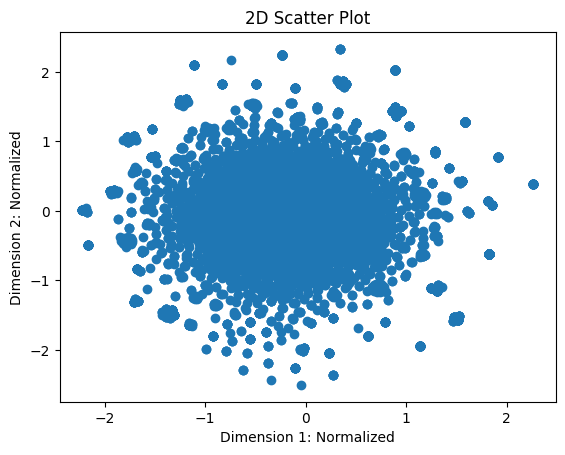

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


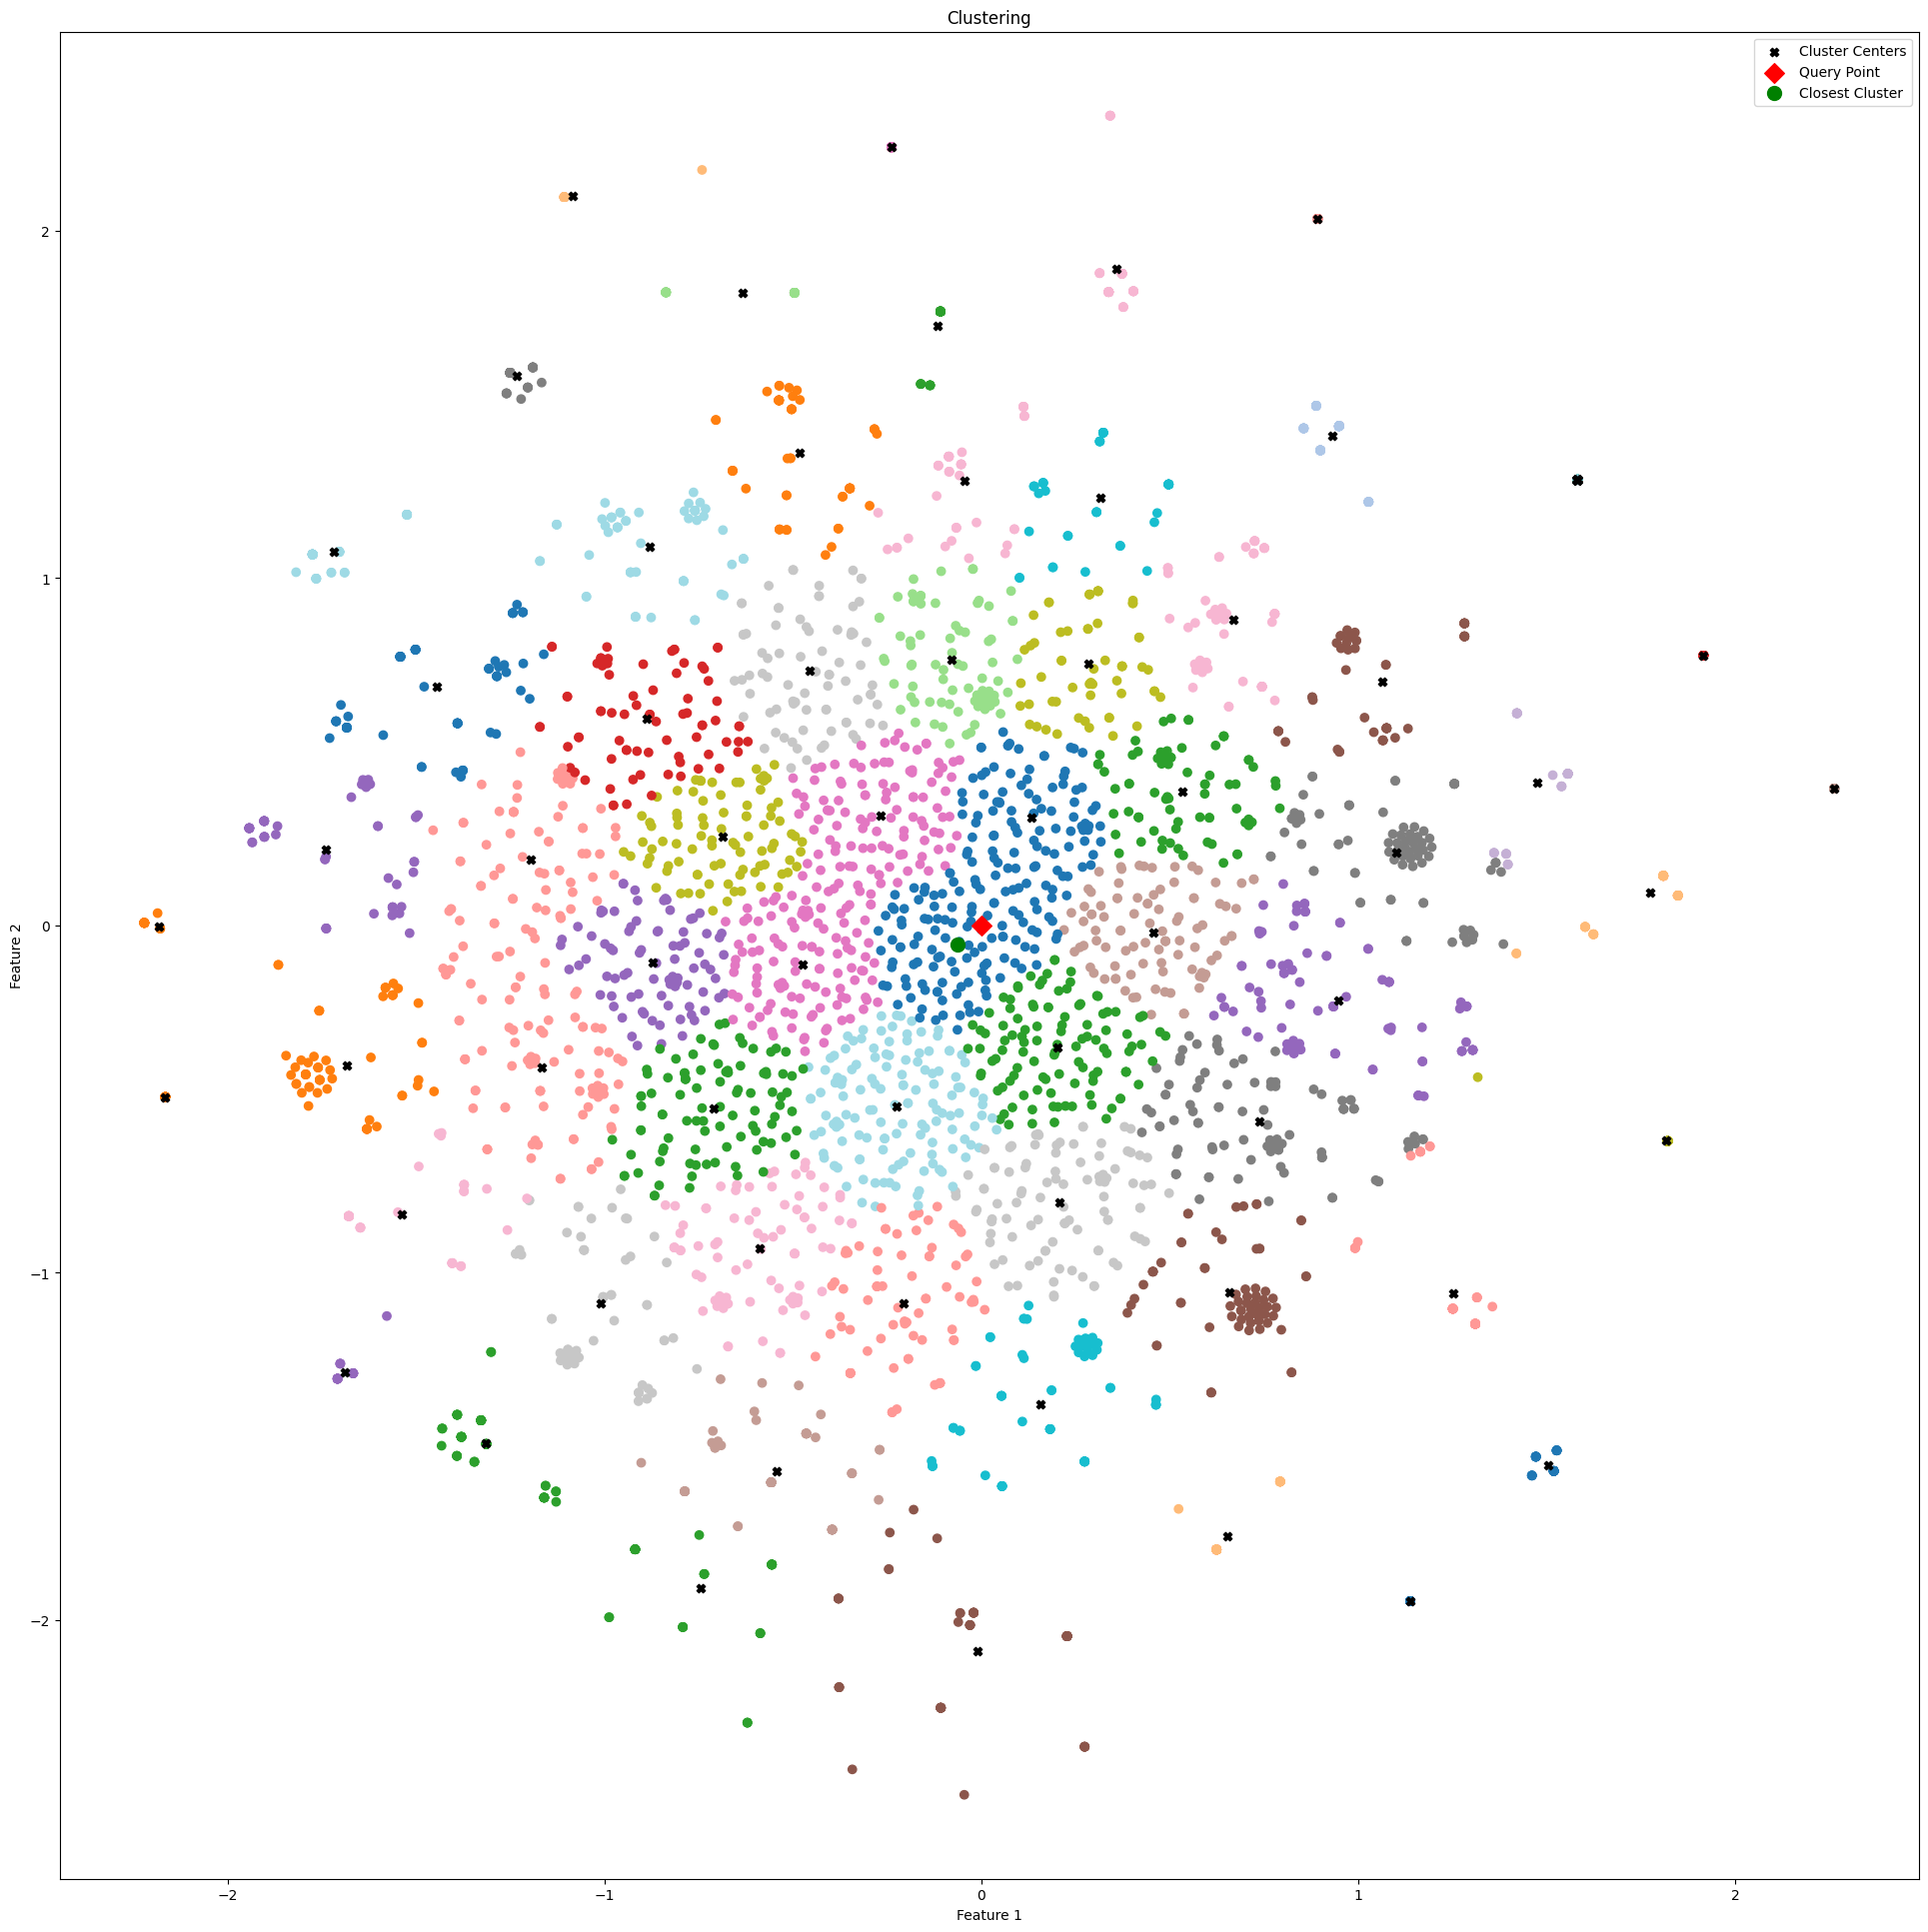

Cluster 1 - Mahalanobis Distance: 2.0374
Cluster 2 - Mahalanobis Distance: 84.9828
Cluster 3 - Mahalanobis Distance: 0.6652
Cluster 4 - Mahalanobis Distance: 12.5058
Cluster 5 - Mahalanobis Distance: 2.0374
Cluster 6 - Mahalanobis Distance: 2253.7222
Cluster 7 - Mahalanobis Distance: 3.0203
Cluster 8 - Mahalanobis Distance: 2.0374
Cluster 9 - Mahalanobis Distance: 2.0374
Cluster 10 - Mahalanobis Distance: 2.0374
Cluster 11 - Mahalanobis Distance: 2.0374
Cluster 12 - Mahalanobis Distance: 2.0374
Cluster 13 - Mahalanobis Distance: 2.0374
Cluster 14 - Mahalanobis Distance: 43.2515
Cluster 15 - Mahalanobis Distance: 2.0374
Cluster 16 - Mahalanobis Distance: 2.0374
Cluster 17 - Mahalanobis Distance: 2.0374
Cluster 18 - Mahalanobis Distance: 92.3879
Cluster 19 - Mahalanobis Distance: 14.7425
Cluster 20 - Mahalanobis Distance: 2220.9881
Cluster 21 - Mahalanobis Distance: 2.0374
Cluster 22 - Mahalanobis Distance: 2.0374
Cluster 23 - Mahalanobis Distance: 9.2909
Cluster 24 - Mahalanobis Distanc

In [ ]:
if __name__ == "__main__":

    embeddings = embed_linguistic_data(Modern_formal1)

    n_dimensions = 2
    perplexity = 30
    tsne_model = TSNE(n_components=n_dimensions, perplexity=perplexity)
    n_dimensional_points = tsne_model.fit_transform(embeddings)

    mean_values = np.mean(n_dimensional_points, axis=0)
    std_values = np.std(n_dimensional_points, axis=0)
    z_score_normalized_data = (n_dimensional_points - mean_values) / std_values

    print("Mean of z-score normalized data:", np.mean(z_score_normalized_data, axis=0))
    print("Standard deviation of z-score normalized data:", np.std(z_score_normalized_data, axis=0))

    plt.scatter(z_score_normalized_data[:, 0], z_score_normalized_data[:, 1], marker='o', cmap='viridis')
    plt.xlabel('Dimension 1: Normalized')
    plt.ylabel('Dimension 2: Normalized')
    plt.title('2D Scatter Plot')
    plt.show()

    np.random.seed(39)
    X = z_score_normalized_data

    Modern1_cluster_centers_indices, Modern1_cluster_centers = affinity_propagation(X)

    if not Modern1_cluster_centers.any():
        print("Clustering failed to converge.")
    else:
        Modern1_clusters_data = [X[Modern1_cluster_centers_indices == i] for i in range(len(Modern1_cluster_centers))]
        covariances = [compute_covariance_matrix(cluster_data) for cluster_data in Modern1_clusters_data]

        query_point = np.array([0.0, 0.0])

        distances2 = mahalanobis_distance(query_point, Modern1_cluster_centers, covariances)

        min_distance = float('inf')
        min_cluster_index = -1
        for i, distance in enumerate(distances2):
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = i

        plot_clusters(X, Modern1_cluster_centers_indices, Modern1_cluster_centers, query_point, min_cluster_index)

        for i, distance in enumerate(distances2):
            print(f"Cluster {i+1} - Mahalanobis Distance: {distance:.4f}")

        if min_cluster_index != -1:
            print(f"\nCluster with the smallest Mahalanobis distance: Cluster {min_cluster_index + 1}")

In [ ]:
calculate_jaccard_similarity(Illiad1_cluster_centers_indices, Modern1_cluster_centers_indices)

0.4140127388535032

# Statistics (No Outlier Removal)

Summary Statistics:
Data: [11.41531458035965, 8.573397714570298, 10.776530208231303, 12.053461971317802, 13.185950130093653, 23.39016962281015, 7.236961595481553, 9.270553555748851, 2.9244053758686714, 17.801438246468788, 10.01818223163318, 13.069140765916115, 11.955694305909711, 1.0657356882013616, 13.91474425518363, 7.020719047589492, 8.455205188946772, 3.0841860891998056, 2203.3500273491118, 10.938265989814477, 9.448294427164951, 11.918422514223924, 6.792725157463328, 7.3850499276367625, 7.848393466235301, 9.827622427756998, 4.521387067023393, 11.713875018708919, 4.9029452026142595, 8.335961063946957, 7.2937394493321674, 6.702336585190128, 17.259150584053852, 6.56820282041509, 8.145470839178733, 10.677208689567532, 13.172598387855396, 8.738972087173519, 11.850560137285095, 17.085941065072205, 19.6471203409142, 2.9996287601138736, 12.64791260696596, 13.642586973391529, 1640.2399298871408, 19.524779206828, 3.7861221757517063, 11.371481600402984, 6.485287561580853, 12.211309853670878, 

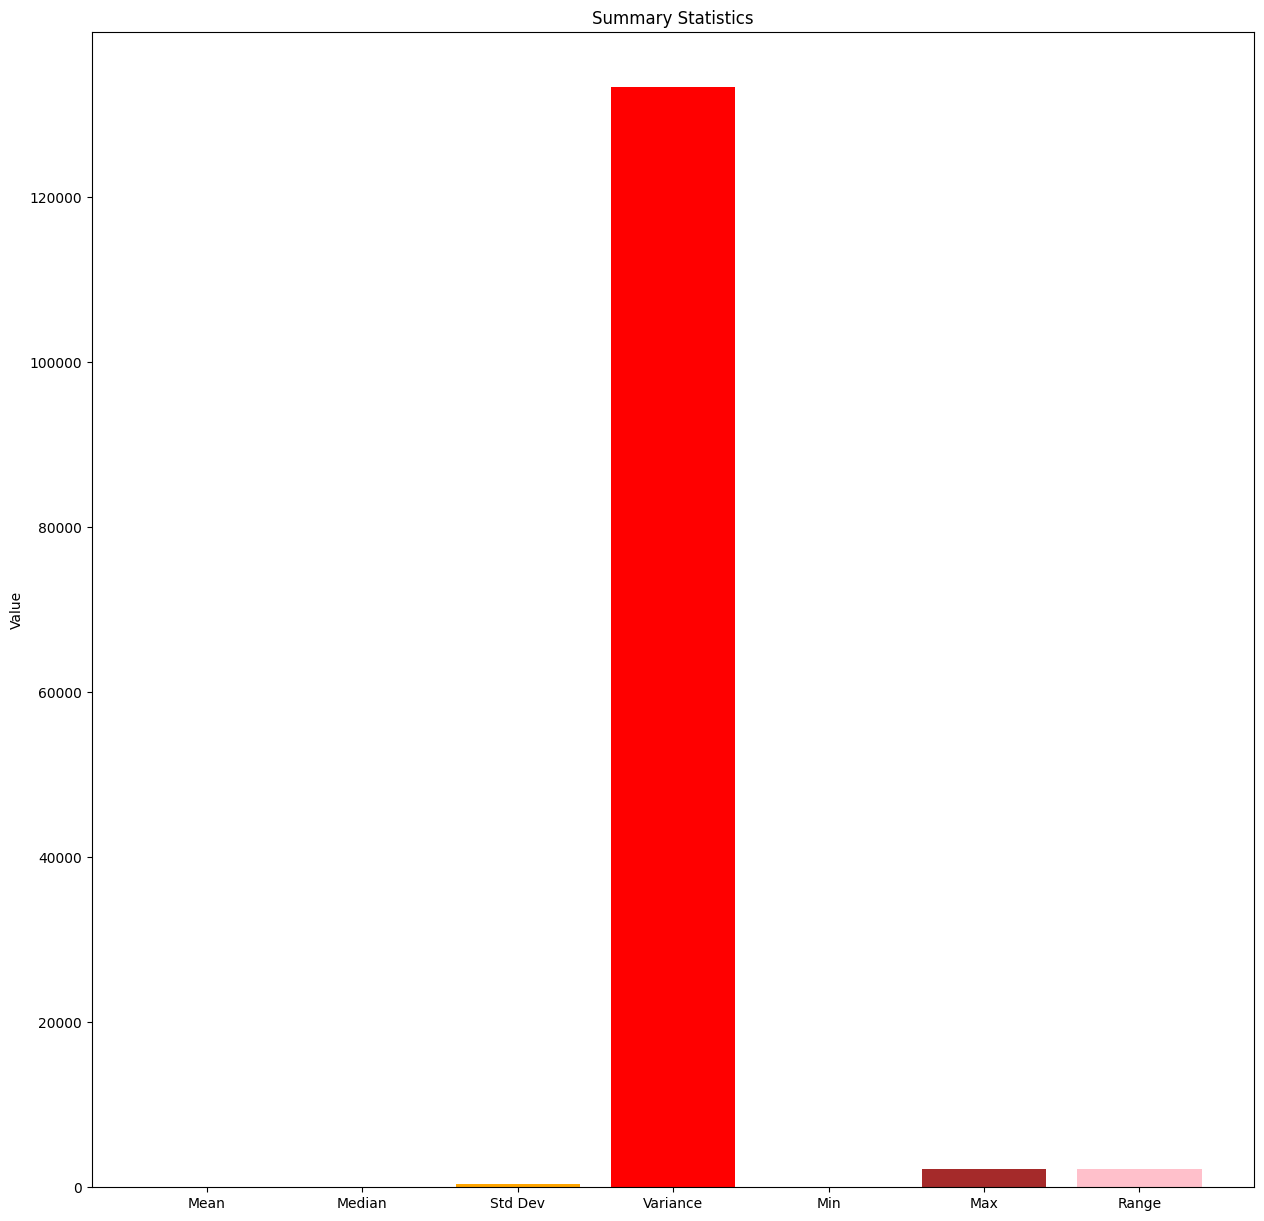

In [ ]:
data = distances01

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [13.25016066981803, 6.977224592667988, 11.367553140853133, 36.19238366044536, 10.111263934488534, 103.77707838245018, 15.931869662024802, 6.050453741016035, 22.994887767651992, 6.86517724802415, 4.834763297622795, 5.514474807932653, 8.536300064211495, 20.775041096972473, 6.949098822969118, 9.027283477573837, 15.073196309672921, 2.9605128311359605, 5.579582413978285, 9.329291959754714, 3.929530272831377, 21.038389880804523, 61.48904964886165, 9.658881690248737, 17.498555292959836, 8.574177444216984, 3.1289332287596907, 0.9044740301073694, 7.429672334715614, 4.057227684563746, 7.208080718359839, 3.2143235444424683, 13.314879364336054]
Mean: 14.652841606559766
Median: 8.574177444216984
Standard Deviation: 19.37844622098983
Variance: 375.52417793979504
Minimum Value: 0.9044740301073694
Maximum Value: 103.77707838245018
Range: 102.87260435234282
Count: 33


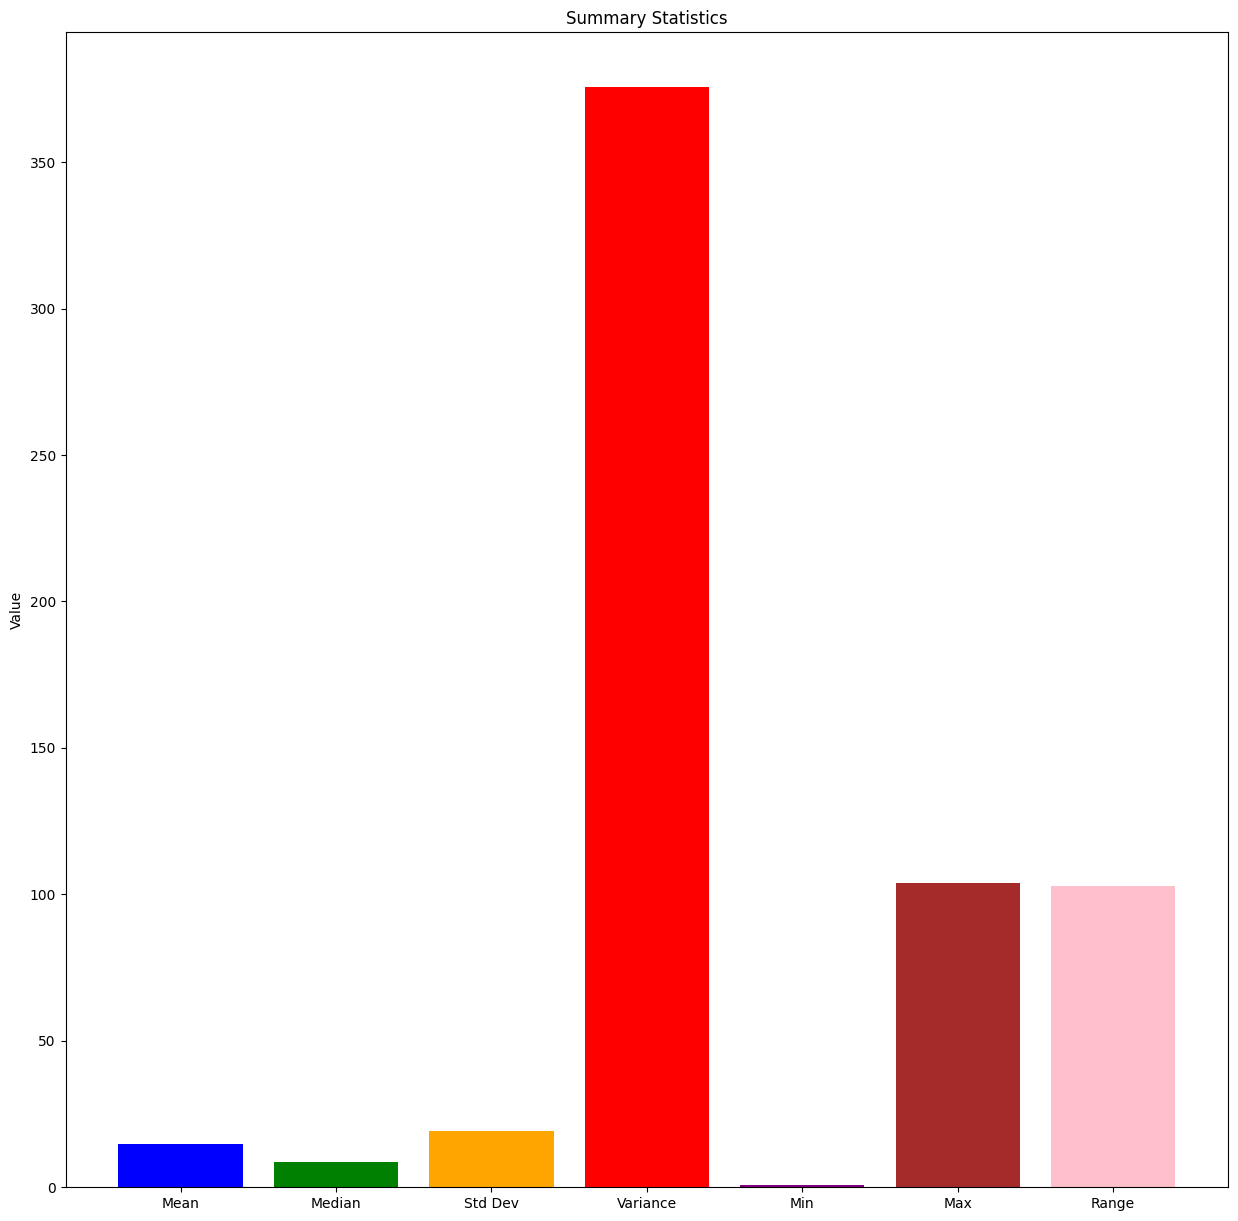

In [ ]:
data = distances02

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [127.55190263747268, 6.132701845268349, 28.683043803950195, 8.692955037960186, 11.913687244823612, 14.93308423878493, 0.1342368230219694, 5.123890221302562, 14.33222464635192, 10.145129635526187, 14.284172379326593, 8.229282693415689, 642.0476153074678, 19.385969980254814, 15.56509885882347, 38.1252430558847, 8.186551609255199, 12.181563503705789, 9.227374975576694, 10.847724298180008, 6.246047107443589, 8.691517387388487, 10.545020033891442, 8.0511422704756, 9.040531811207051, 5.986227239072026, 2528.178563127506, 15.09792675139394, 7.84602006093656, 4.872006372341624, 11.221022258757703, 8.534868032937233, 27.372884883863282, 9.092230903997734, 4.065245040010946, 14.511124953134045, 3.445803295962288, 6.515569477232245, 10.434067460405847, 6.011478736118625, 11.7283552669924, 10.074341658514099, 65.93087520751361, 3.357143868029449, 12.093146503253177, 2601.164430643269, 3.6772465288586176, 9.184070364061798, 9.818026720955622, 9.289041577485557, 8.852595287

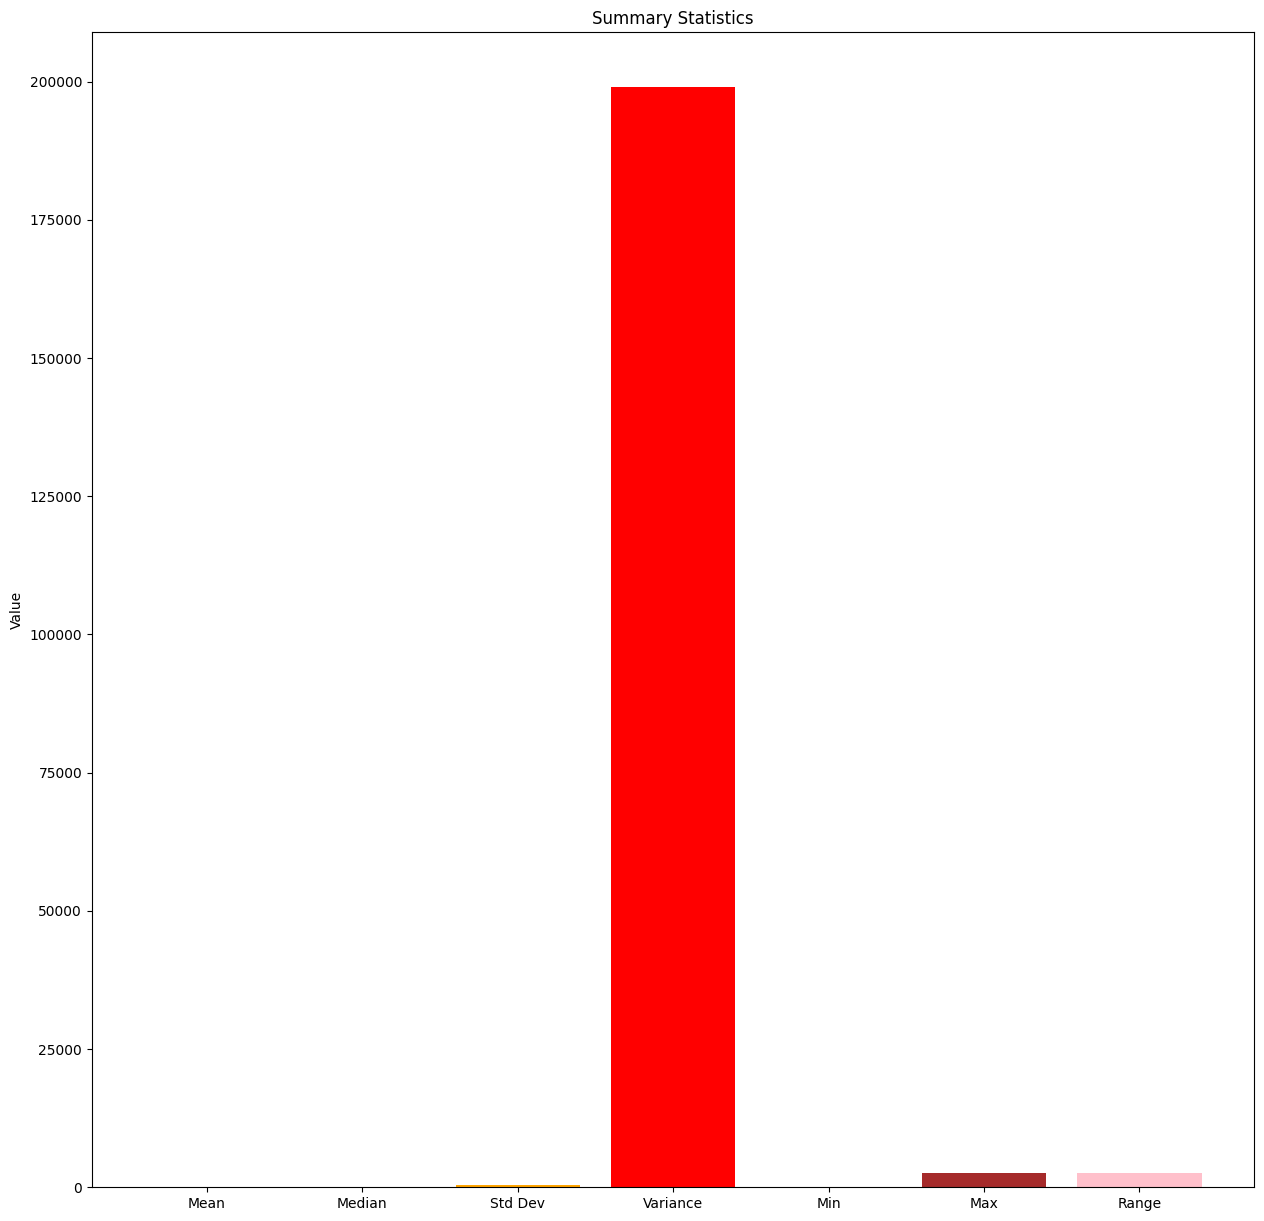

In [ ]:
data = distances1

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [2.0373890715009715, 84.98275418886595, 0.6652292661126861, 12.505768485062534, 2.0373890715009715, 2253.722235630329, 3.020274045312367, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 43.25150121130417, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 92.38793745776928, 14.7424507023655, 2220.9880986083967, 2.0373890715009715, 2.0373890715009715, 9.290886504266725, 2.0373890715009715, 2.0373890715009715, 29.487045872653663, 2.0373890715009715, 2.0373890715009715, 2282.330190714203, 2.0373890715009715, 87.473375865416, 2.0373890715009715, 41.222912036269136, 15.546333980911669, 77.08295439539486, 6.135263488706477, 3.325245779650797, 5.720634357776072, 2.0373890715009715, 2.0373890715009715, 5.646900512979204, 1819.85129298443, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715

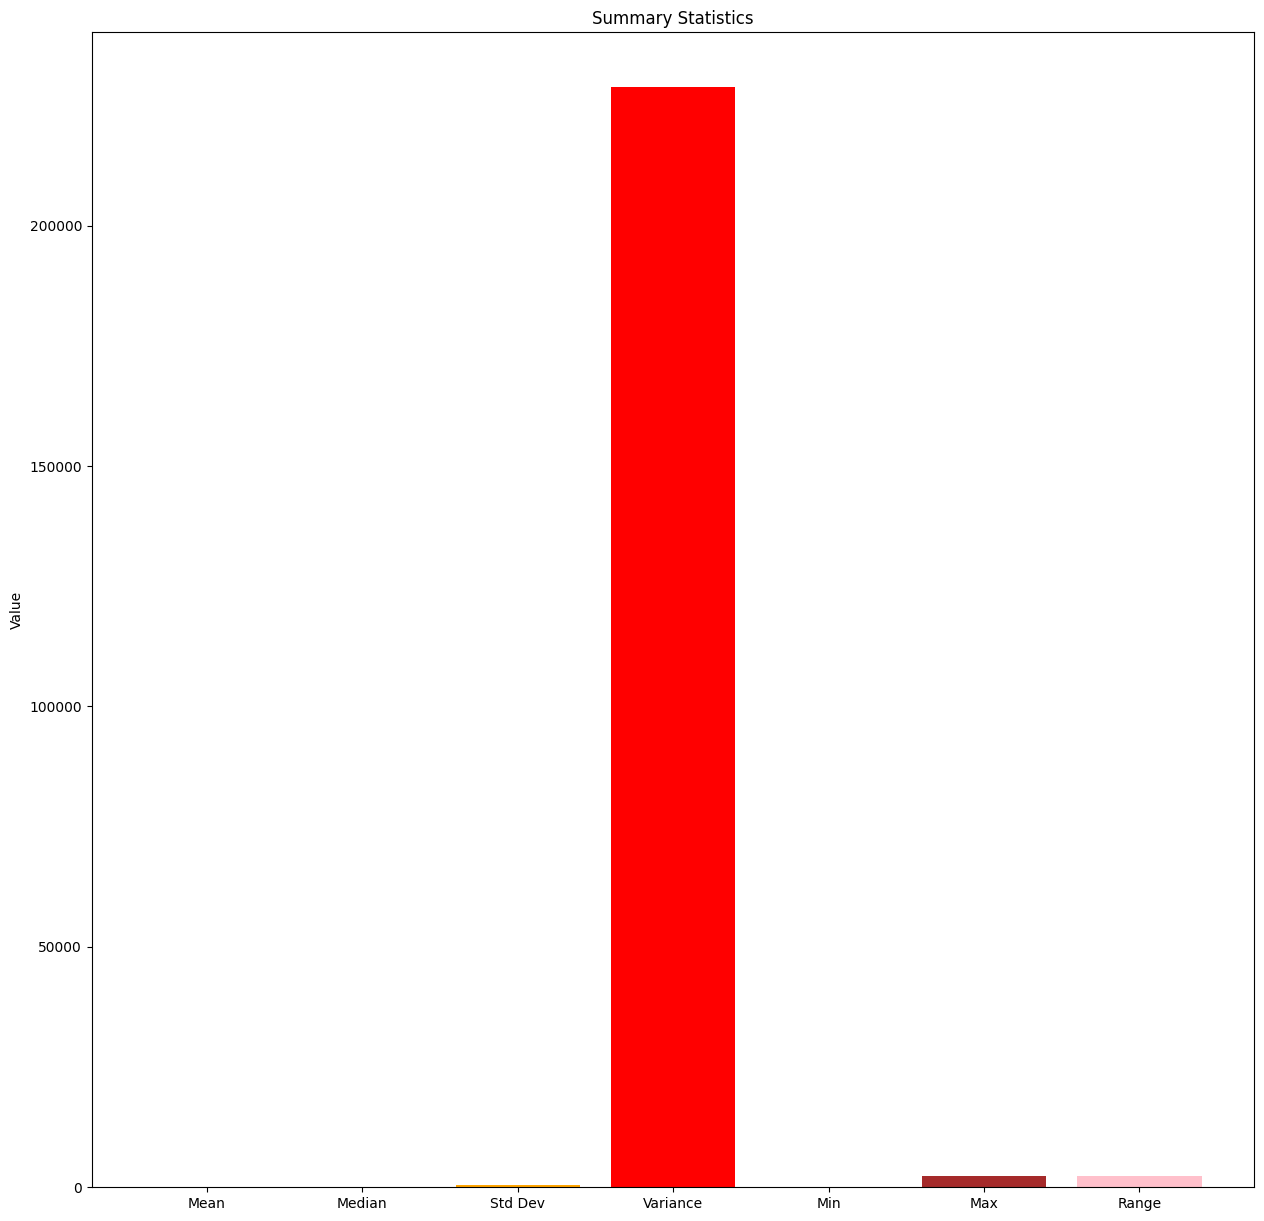

In [ ]:
data = distances2

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

# Statistics (Outlier Removal)

In [ ]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

In [ ]:
distances1_NoOutliers = remove_outliers(distances1)
distances2_NoOutliers = remove_outliers(distances2)
distances01_NoOutliers = remove_outliers(distances01)
distances02_NoOutliers = remove_outliers(distances02)

Summary Statistics:
Data: [11.41531458035965, 8.573397714570298, 10.776530208231303, 12.053461971317802, 13.185950130093653, 7.236961595481553, 9.270553555748851, 2.9244053758686714, 17.801438246468788, 10.01818223163318, 13.069140765916115, 11.955694305909711, 1.0657356882013616, 13.91474425518363, 7.020719047589492, 8.455205188946772, 3.0841860891998056, 10.938265989814477, 9.448294427164951, 11.918422514223924, 6.792725157463328, 7.3850499276367625, 7.848393466235301, 9.827622427756998, 4.521387067023393, 11.713875018708919, 4.9029452026142595, 8.335961063946957, 7.2937394493321674, 6.702336585190128, 17.259150584053852, 6.56820282041509, 8.145470839178733, 10.677208689567532, 13.172598387855396, 8.738972087173519, 11.850560137285095, 17.085941065072205, 19.6471203409142, 2.9996287601138736, 12.64791260696596, 13.642586973391529, 19.524779206828, 3.7861221757517063, 11.371481600402984, 6.485287561580853, 12.211309853670878, 5.8052950295808055, 6.300167607221923, 9.338029493121475, 6

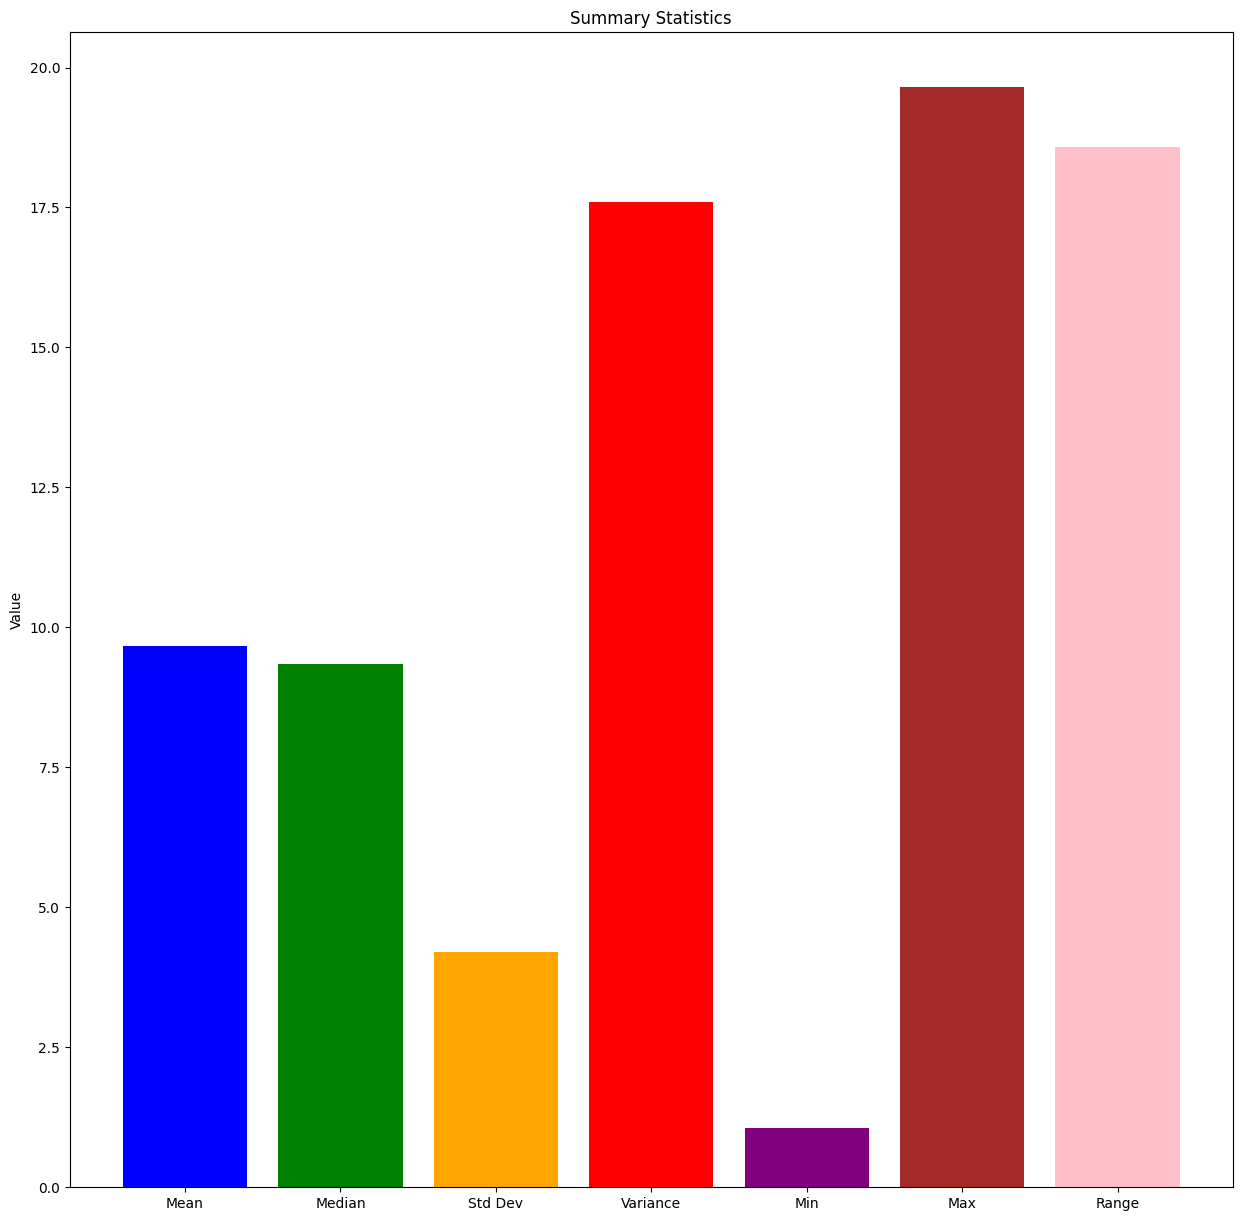

In [ ]:
data = distances01_NoOutliers

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [13.25016066981803, 6.977224592667988, 11.367553140853133, 10.111263934488534, 15.931869662024802, 6.050453741016035, 22.994887767651992, 6.86517724802415, 4.834763297622795, 5.514474807932653, 8.536300064211495, 20.775041096972473, 6.949098822969118, 9.027283477573837, 15.073196309672921, 2.9605128311359605, 5.579582413978285, 9.329291959754714, 3.929530272831377, 21.038389880804523, 9.658881690248737, 17.498555292959836, 8.574177444216984, 3.1289332287596907, 0.9044740301073694, 7.429672334715614, 4.057227684563746, 7.208080718359839, 3.2143235444424683, 13.314879364336054]
Mean: 9.402842044157174
Median: 7.982986199463555
Standard Deviation: 5.670717689142313
Variance: 32.15703910995153
Minimum Value: 0.9044740301073694
Maximum Value: 22.994887767651992
Range: 22.090413737544623
Count: 30


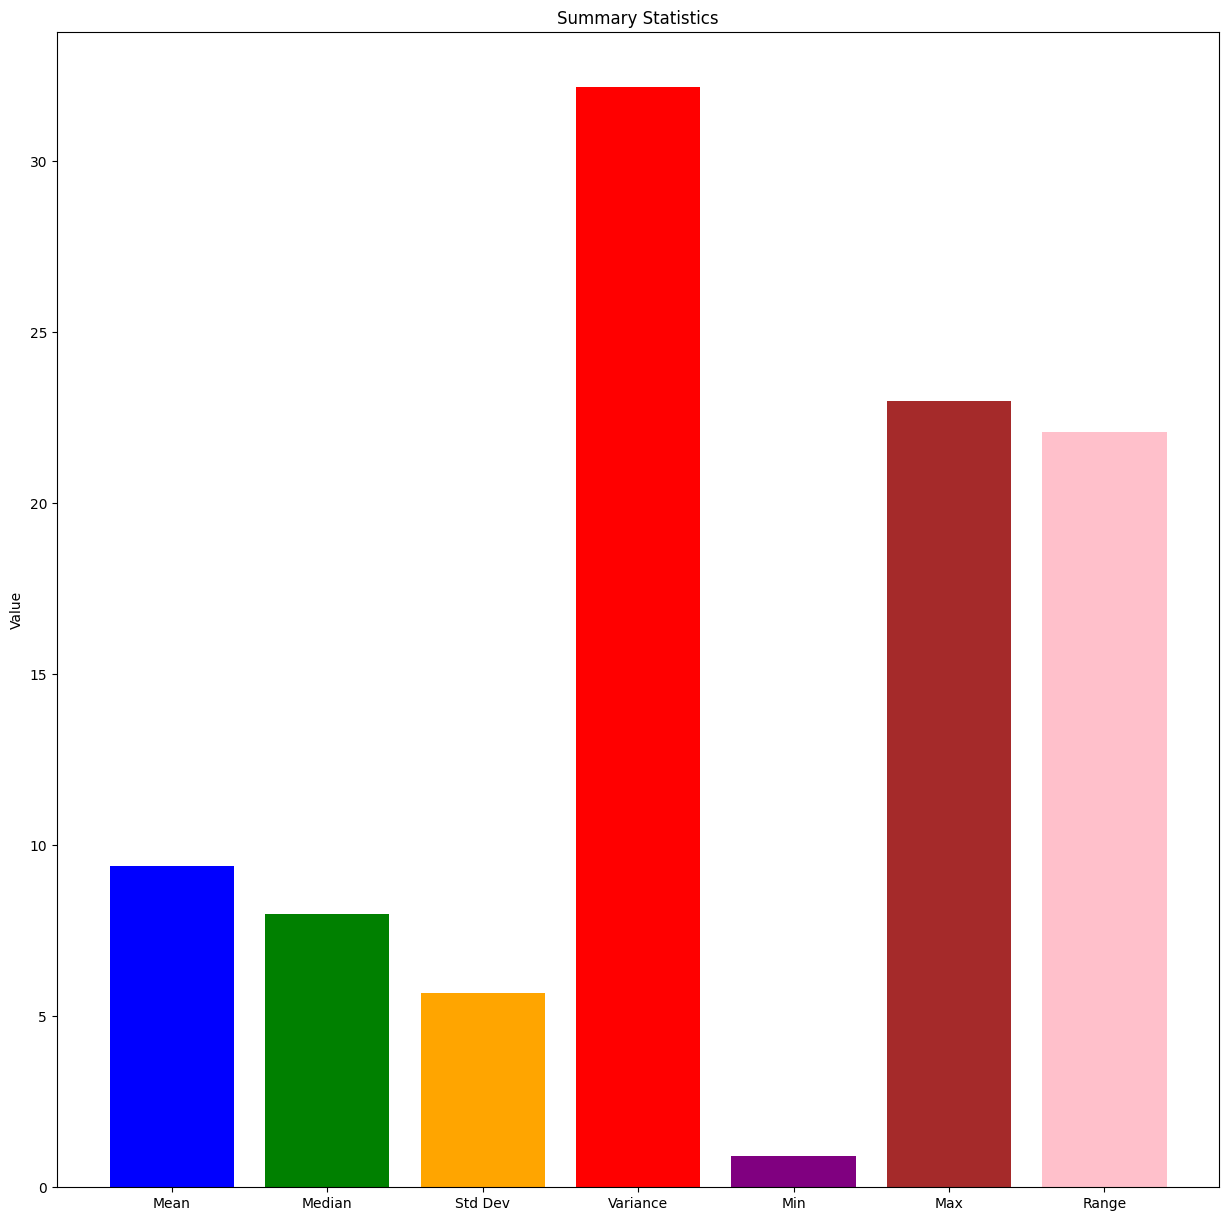

In [ ]:
data = distances02_NoOutliers

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [6.132701845268349, 8.692955037960186, 11.913687244823612, 14.93308423878493, 0.1342368230219694, 5.123890221302562, 14.33222464635192, 10.145129635526187, 14.284172379326593, 8.229282693415689, 19.385969980254814, 15.56509885882347, 8.186551609255199, 12.181563503705789, 9.227374975576694, 10.847724298180008, 6.246047107443589, 8.691517387388487, 10.545020033891442, 8.0511422704756, 9.040531811207051, 5.986227239072026, 15.09792675139394, 7.84602006093656, 4.872006372341624, 11.221022258757703, 8.534868032937233, 9.092230903997734, 4.065245040010946, 14.511124953134045, 3.445803295962288, 6.515569477232245, 10.434067460405847, 6.011478736118625, 11.7283552669924, 10.074341658514099, 3.357143868029449, 12.093146503253177, 3.6772465288586176, 9.184070364061798, 9.818026720955622, 9.289041577485557, 8.852595287942368, 7.945726641089495, 10.117883358915343, 9.167116191312893, 3.6979964987384535, 7.220735287366219, 12.485045207543088, 5.359850715288587, 7.13807342

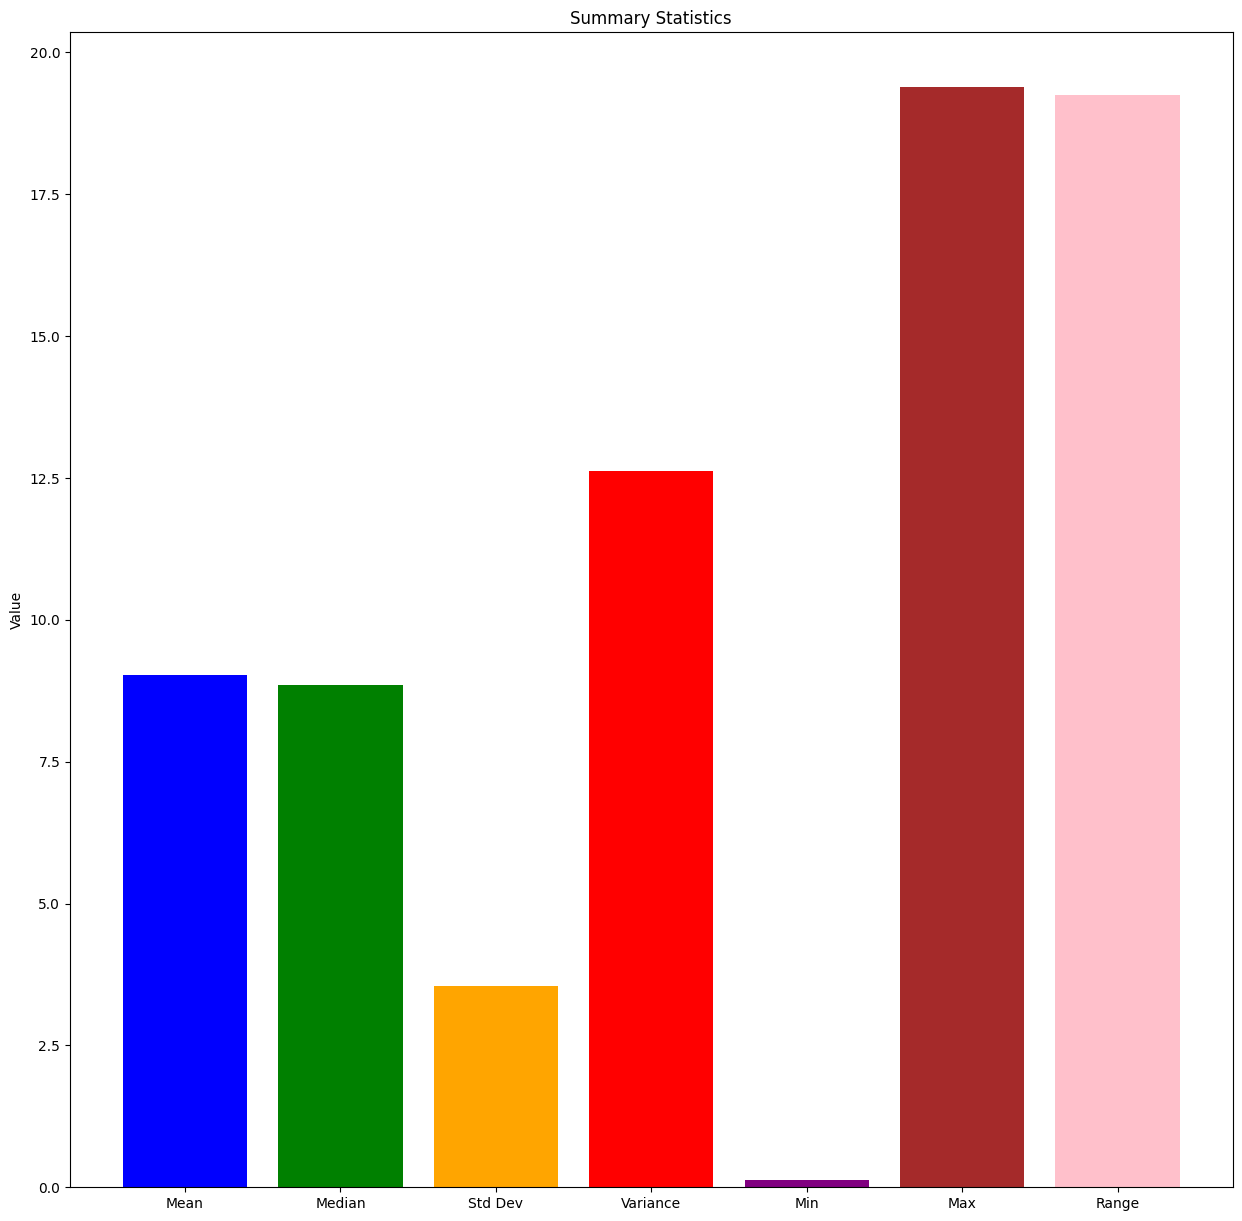

In [ ]:
data = distances1_NoOutliers

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

Summary Statistics:
Data: [2.0373890715009715, 0.6652292661126861, 12.505768485062534, 2.0373890715009715, 3.020274045312367, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 14.7424507023655, 2.0373890715009715, 2.0373890715009715, 9.290886504266725, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 15.546333980911669, 6.135263488706477, 3.325245779650797, 5.720634357776072, 2.0373890715009715, 2.0373890715009715, 5.646900512979204, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 7.51811807931781, 2.0373890715009715, 2.0373890715009715, 6.792114995709443, 2.0373890715009715, 2.0373890715009715, 2.0373890715009715, 14.717574442360847, 10.505552825266726, 10.3

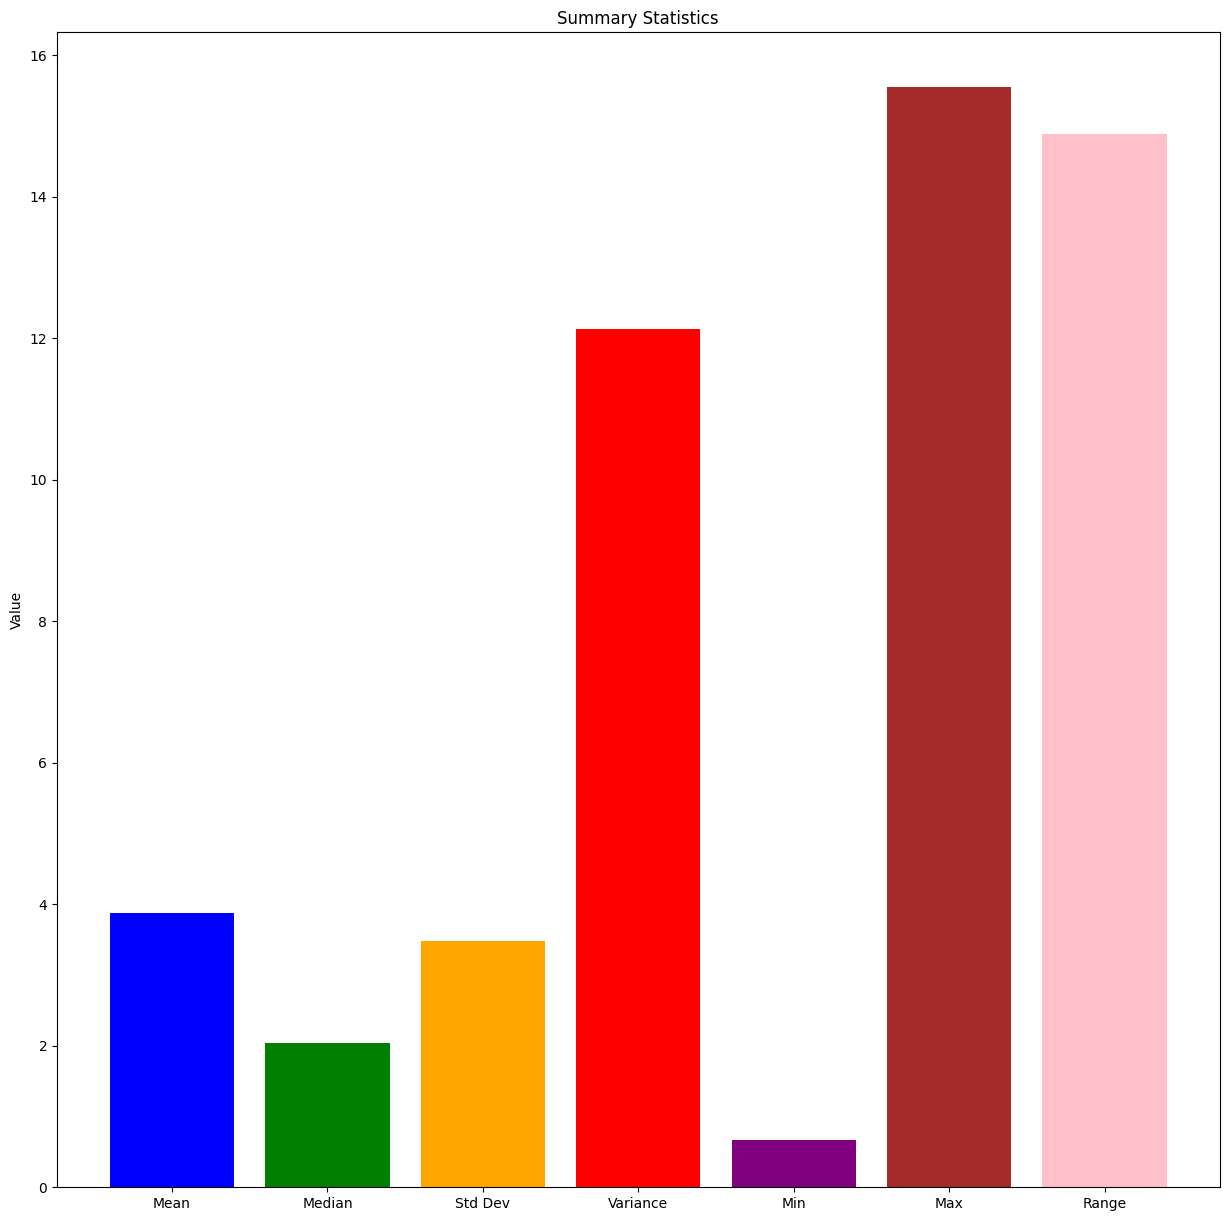

In [ ]:
data = distances2_NoOutliers

mean = np.mean(data)
median = np.median(data)
std_deviation = np.std(data)
variance = np.var(data)
min_value = np.min(data)
max_value = np.max(data)
range_value = np.ptp(data)
count = len(data)

print("Summary Statistics:")
print(f"Data: {data}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Range: {range_value}")
print(f"Count: {count}")

labels = ['Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range']
values = [mean, median, std_deviation, variance, min_value, max_value, range_value]

plt.figure(figsize=(15, 15))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink'])
plt.title('Summary Statistics')
plt.ylabel('Value')
plt.show()

# Statistical Significance Calculation (Using Student's T-Test)

In [ ]:
Informal = [0.6, 0.6470588235294118, 0.5925925925925926, 0.6274509803921569, 0.6111111111111112]#List of Results from Five Trials for Informal
Formal = [0.4064516129032258, 0.4129032258064516, 0.41935483870967744,  0.4050632911392405, 0.4140127388535032]#List of Results from Five Trials for Formal

t_statistic, p_value = stats.ttest_ind(Informal, Formal)

a = 0.05

if p_value < a:
    print("Significant!")
else:
    print("Not Significant")

Significant!


# Data Collection Results (Five Trials)

https://docs.google.com/document/d/1QI4gKBjjVNZxtRZSkmsVPbq60u9pGyKlM35jivhGlSA/edit

In [ ]:
print("Average Formal Similarity Value: " + str(sum(Formal)/len(Formal))) #Value for Similarity Reported in Paper
print("Average Informal Similarity Value: " + str(sum(Informal)/len(Informal))) #Value for Similarity Reported in Paper

Average Formal Similarity Value: 0.41155714148241973
Average Informal Similarity Value: 0.6156427015250545
